In [7]:
#coding=utf-8
# standard library
import gc
import importlib
import os
import sys
import pickle
import socket
import statistics
import struct
import time
from datetime import datetime

# pip3 library
import psutil
import scipy
import tqdm
import numpy as np
import pandas as pd
import sklearn.cluster as cluster
import xgboost as xgb

# custom functions
import matplotlib.pyplot as plt
import gan_func
importlib.reload(gan_func)  # For reloading after making changes
from gan_func import *
plt.style.use('ggplot')     # select plt style

-------------------------
Check memory
[472806289408, 461568548864]
[472806289408, 461568458752]
-------------------------
Load Dataset
cnt         4.538968
times    9036.158133
dtype: float64 cnt         5.946126
times    5619.245171
dtype: float64
   count
0   1888
1   3424
Data preprocessing finish
Start to setting GAN


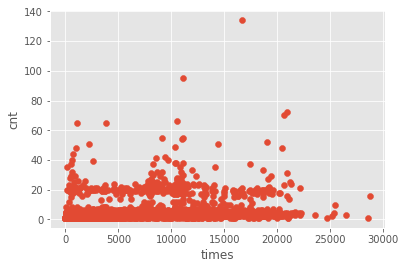

In [8]:
# collect trash and check memory
check_memory()

# Load engineered dataset from EDA section
dataSample = pd.read_csv('server.csv')
dataSample_o = pd.read_csv('../client_cnt/client.csv')
print('Load Dataset')
label_cols = ['Class']

# save traffic
normalized_dataSample = (dataSample - dataSample.mean()) / dataSample.std()
normalized_dataSample_o = (dataSample_o - dataSample_o.mean()) / dataSample_o.std()
data_cols = ['times', 'cnt']
print(dataSample.mean(), dataSample.std())
train = normalized_dataSample.copy()
train_o = normalized_dataSample_o.copy()
labels = cluster.KMeans(n_clusters=2, random_state=0).fit_predict(train[data_cols])
print(pd.DataFrame([[np.sum(labels == i)] for i in np.unique(labels)], columns=['count'], index=np.unique(labels)))
print('Data preprocessing finish')


# Generate arguments and training the GAN and WGAN architectures, WGAN are use WGAN-GP
print('Start to setting GAN')
fraud_w_classes = train.copy()

# print the original data figure
origin = dataSample.values.copy()
x2 = origin[:, 1]
y2 = origin[:, 0]
plt.scatter(x2, y2)
plt.xlabel('times')
plt.ylabel('cnt')
plt.show()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, 2)            0                                            
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 34)           0           input_10[0][0]                   
                                                                 input_11[0][0]                   
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 128)          4480        concatenate_7[0][0]              
__________

Step: 0 of 25001.
Losses: G, D Gen, D Real, Xgb: 0.0333, -0.0205, 0.0996, 0.9950
D Real - D Gen: 0.1201


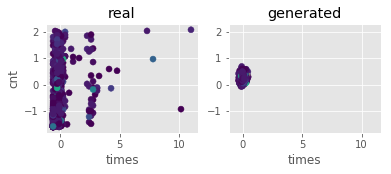

Step: 100 of 25001.
Losses: G, D Gen, D Real, Xgb: 0.0181, 0.0286, 0.0641, 0.9370
D Real - D Gen: 0.0355


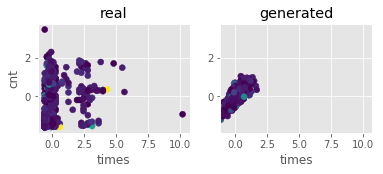

Step: 200 of 25001.
Losses: G, D Gen, D Real, Xgb: 0.0481, -0.0387, -0.0115, 0.9320
D Real - D Gen: 0.0271


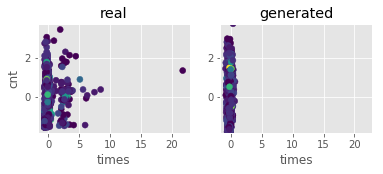

Step: 300 of 25001.
Losses: G, D Gen, D Real, Xgb: 0.0361, -0.0172, 0.0839, 0.9720
D Real - D Gen: 0.1012


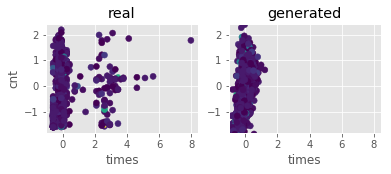

Step: 400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0215, -0.0149, 0.0093, 0.9630
D Real - D Gen: 0.0242


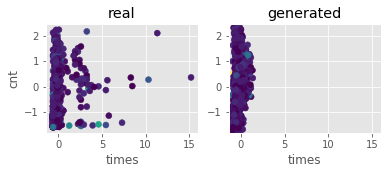

Step: 500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0205, -0.0036, 0.0597, 0.9710
D Real - D Gen: 0.0633


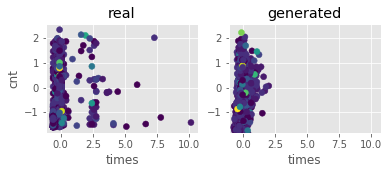

Step: 600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0119, 0.0059, 0.0442, 0.9560
D Real - D Gen: 0.0384


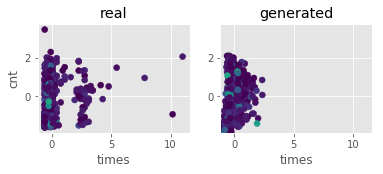

Step: 700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0309, 0.0341, 0.0567, 0.9370
D Real - D Gen: 0.0227


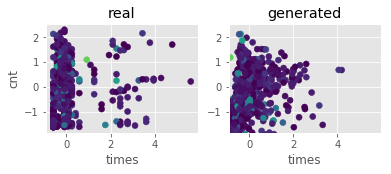

Step: 800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0501, 0.0329, 0.0488, 0.9720
D Real - D Gen: 0.0159


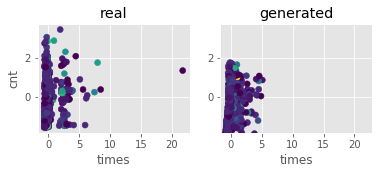

Step: 900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0581, -0.0038, 0.0404, 0.9630
D Real - D Gen: 0.0442


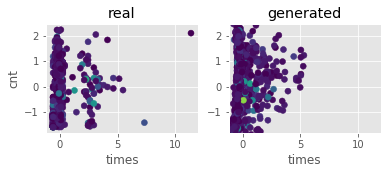

Step: 1000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0697, 0.0728, 0.0704, 0.9730
D Real - D Gen: -0.0024


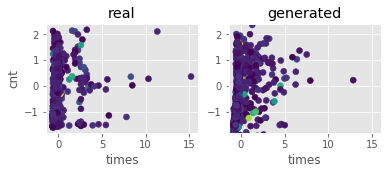

Step: 1100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0510, 0.0551, 0.0742, 0.9750
D Real - D Gen: 0.0190


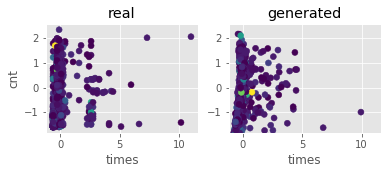

Step: 1200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1114, 0.0920, 0.1123, 0.9510
D Real - D Gen: 0.0203


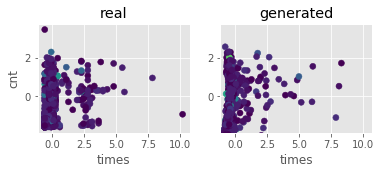

Step: 1300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1066, 0.1215, 0.1035, 0.9670
D Real - D Gen: -0.0180


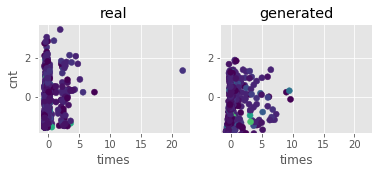

Step: 1400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0655, 0.1019, 0.0701, 0.9340
D Real - D Gen: -0.0318


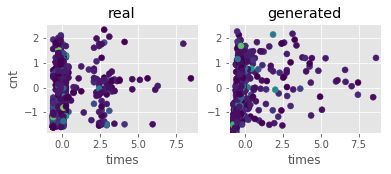

Step: 1500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0510, 0.0706, 0.0769, 0.9920
D Real - D Gen: 0.0064


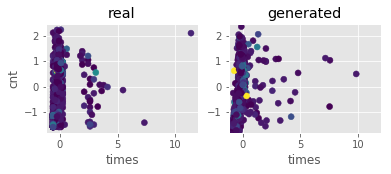

Step: 1600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0545, 0.0695, 0.0989, 0.9550
D Real - D Gen: 0.0295


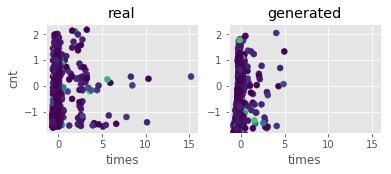

Step: 1700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1039, 0.0775, 0.0891, 0.9610
D Real - D Gen: 0.0116


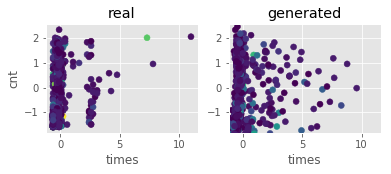

Step: 1800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0811, 0.0874, 0.1159, 0.9520
D Real - D Gen: 0.0285


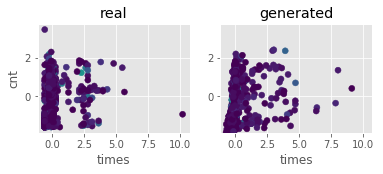

Step: 1900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0875, 0.1471, 0.1568, 0.9480
D Real - D Gen: 0.0096


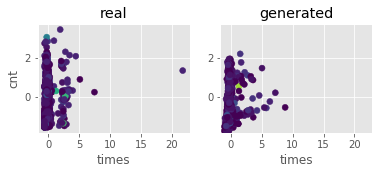

Step: 2000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2616, 0.1496, 0.1544, 0.9600
D Real - D Gen: 0.0048


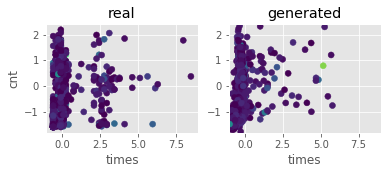

Step: 2100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1400, 0.0983, 0.1032, 0.9540
D Real - D Gen: 0.0050


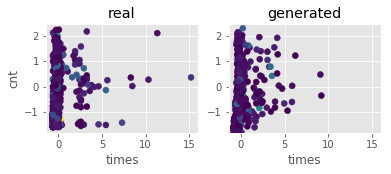

Step: 2200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0646, 0.0694, 0.0940, 0.9310
D Real - D Gen: 0.0246


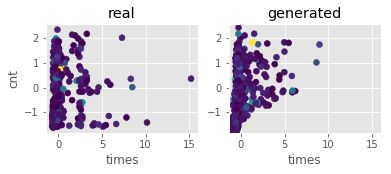

Step: 2300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0515, 0.0556, 0.0257, 0.9520
D Real - D Gen: -0.0299


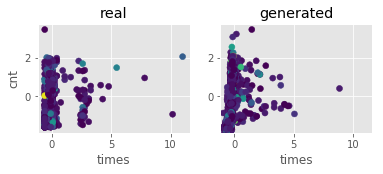

Step: 2400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0950, 0.1218, 0.0908, 0.9380
D Real - D Gen: -0.0309


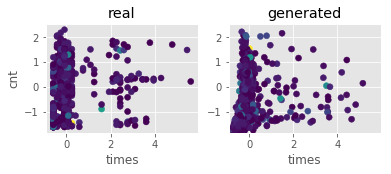

Step: 2500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1124, 0.1152, 0.1185, 0.9030
D Real - D Gen: 0.0033


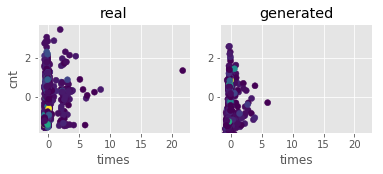

Step: 2600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1704, 0.1181, 0.1227, 0.9330
D Real - D Gen: 0.0047


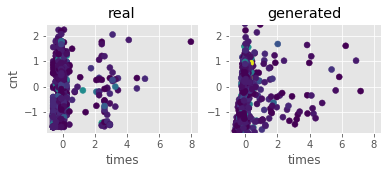

Step: 2700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1610, 0.1480, 0.1083, 0.9500
D Real - D Gen: -0.0396


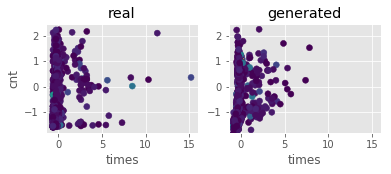

Step: 2800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1349, 0.1331, 0.1768, 0.9570
D Real - D Gen: 0.0437


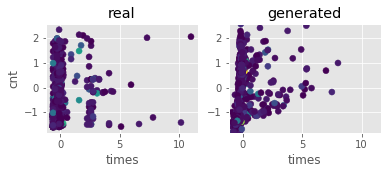

Step: 2900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1069, 0.0890, 0.0867, 0.9590
D Real - D Gen: -0.0023


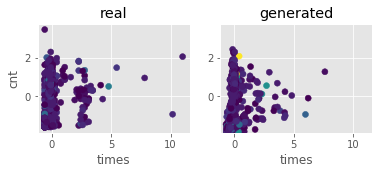

Step: 3000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1643, 0.2745, 0.2831, 0.9670
D Real - D Gen: 0.0086


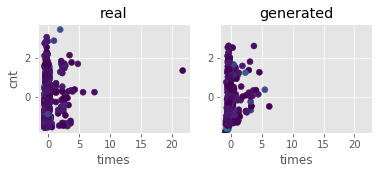

Step: 3100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1778, 0.2133, 0.2150, 0.9310
D Real - D Gen: 0.0016


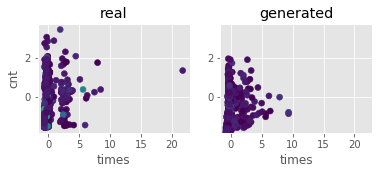

Step: 3200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1870, 0.1548, 0.1695, 0.9630
D Real - D Gen: 0.0148


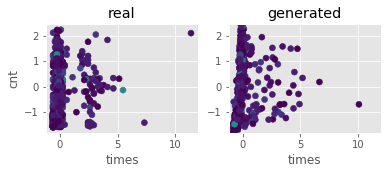

Step: 3300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1807, 0.1834, 0.1663, 0.9500
D Real - D Gen: -0.0170


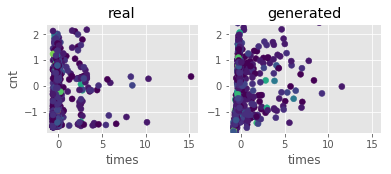

Step: 3400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2382, 0.2559, 0.2592, 0.9600
D Real - D Gen: 0.0033


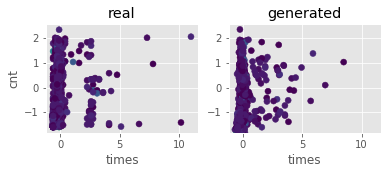

Step: 3500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2631, 0.2758, 0.2777, 0.9540
D Real - D Gen: 0.0019


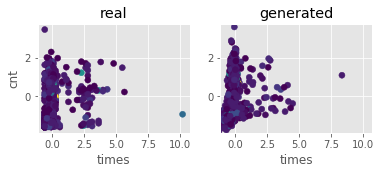

Step: 3600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2622, 0.2892, 0.3098, 0.9480
D Real - D Gen: 0.0206


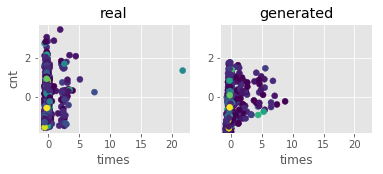

Step: 3700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2064, 0.2014, 0.2104, 0.9360
D Real - D Gen: 0.0091


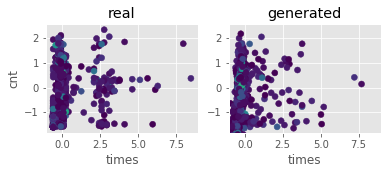

Step: 3800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2068, 0.2020, 0.1989, 0.9670
D Real - D Gen: -0.0031


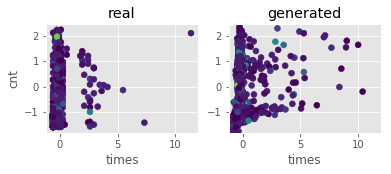

Step: 3900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2392, 0.2593, 0.2656, 0.9450
D Real - D Gen: 0.0063


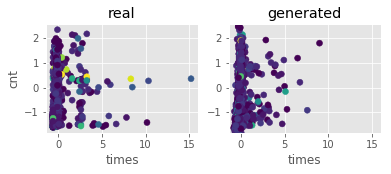

Step: 4000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1742, 0.1831, 0.0823, 0.9610
D Real - D Gen: -0.1008


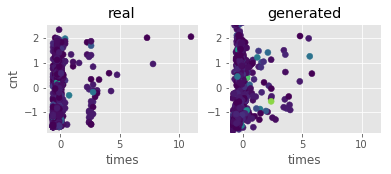

Step: 4100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2199, 0.2411, 0.2500, 0.9240
D Real - D Gen: 0.0088


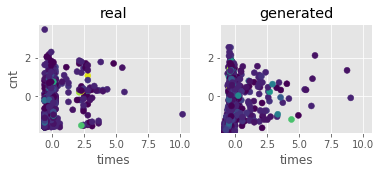

Step: 4200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2424, 0.2634, 0.2777, 0.9650
D Real - D Gen: 0.0144


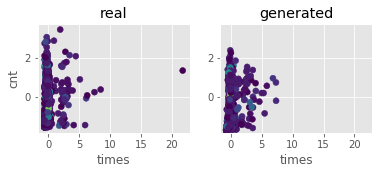

Step: 4300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2387, 0.2439, 0.2475, 0.9610
D Real - D Gen: 0.0036


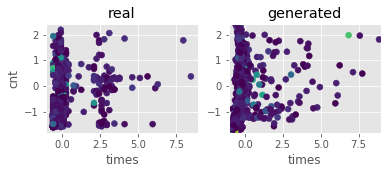

Step: 4400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2942, 0.2846, 0.3079, 0.9470
D Real - D Gen: 0.0234


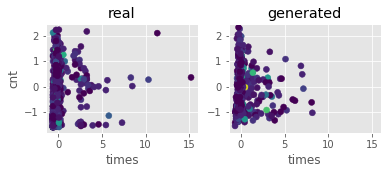

Step: 4500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2774, 0.2708, 0.2734, 0.9460
D Real - D Gen: 0.0026


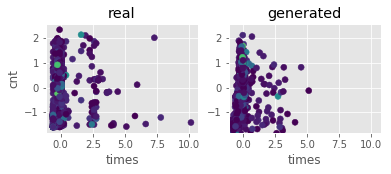

Step: 4600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2651, 0.2517, 0.2529, 0.9480
D Real - D Gen: 0.0011


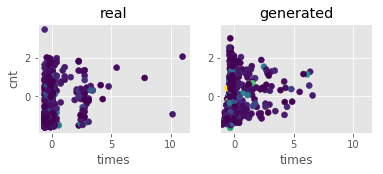

Step: 4700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3146, 0.3166, 0.3062, 0.9220
D Real - D Gen: -0.0104


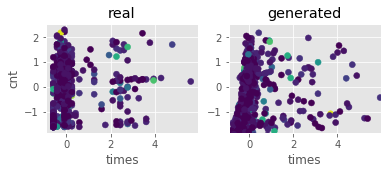

Step: 4800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2406, 0.2673, 0.2714, 0.9510
D Real - D Gen: 0.0041


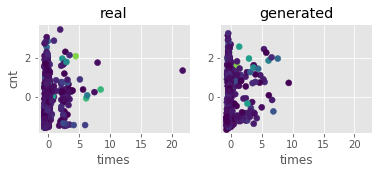

Step: 4900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3417, 0.2782, 0.3066, 0.9330
D Real - D Gen: 0.0285


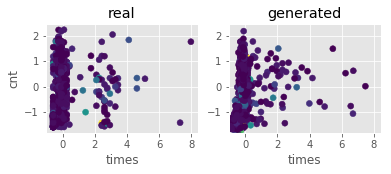

Step: 5000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2846, 0.2766, 0.2770, 0.9610
D Real - D Gen: 0.0004


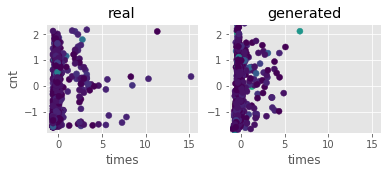

Step: 5100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3260, 0.3066, 0.3100, 0.9660
D Real - D Gen: 0.0034


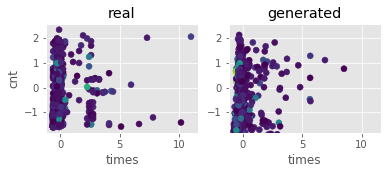

Step: 5200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3311, 0.3538, 0.3502, 0.9480
D Real - D Gen: -0.0036


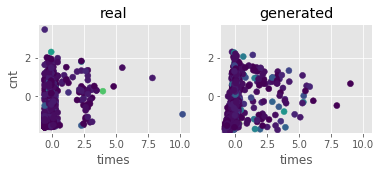

Step: 5300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2871, 0.3038, 0.2703, 0.9350
D Real - D Gen: -0.0336


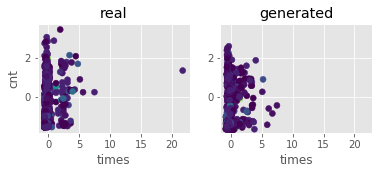

Step: 5400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3489, 0.3527, 0.3566, 0.9410
D Real - D Gen: 0.0039


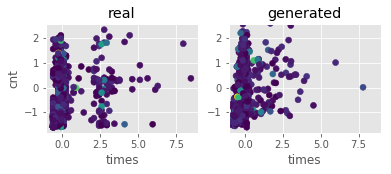

Step: 5500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4012, 0.3610, 0.3827, 0.9670
D Real - D Gen: 0.0217


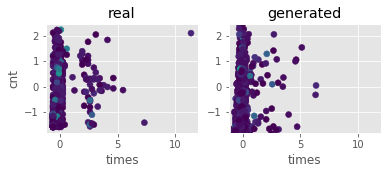

Step: 5600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3725, 0.3786, 0.3827, 0.9520
D Real - D Gen: 0.0041


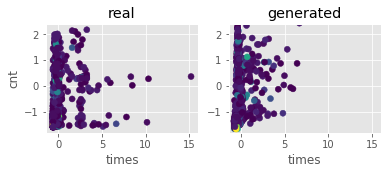

Step: 5700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4164, 0.4164, 0.4225, 0.9720
D Real - D Gen: 0.0060


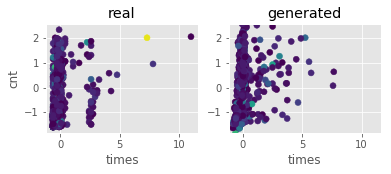

Step: 5800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4077, 0.3202, 0.3339, 0.9490
D Real - D Gen: 0.0137


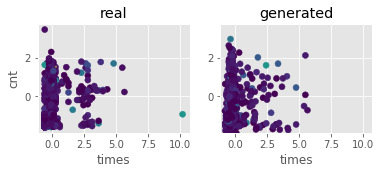

Step: 5900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4216, 0.4815, 0.4757, 0.9840
D Real - D Gen: -0.0057


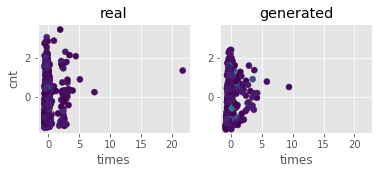

Step: 6000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5102, 0.5945, 0.6366, 0.9650
D Real - D Gen: 0.0420


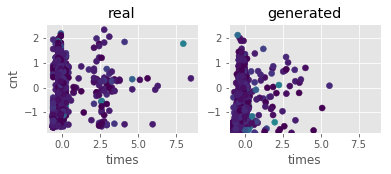

Step: 6100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4379, 0.4572, 0.4743, 0.9570
D Real - D Gen: 0.0171


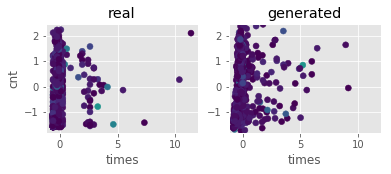

Step: 6200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4358, 0.3910, 0.3847, 0.9450
D Real - D Gen: -0.0063


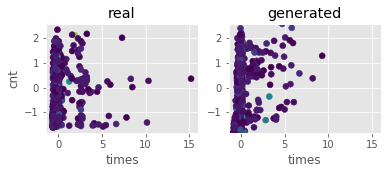

Step: 6300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4175, 0.4170, 0.4379, 0.9570
D Real - D Gen: 0.0209


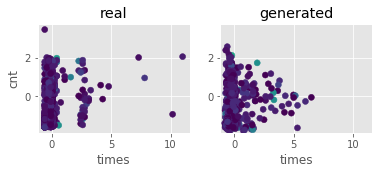

Step: 6400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4382, 0.4324, 0.4441, 0.9270
D Real - D Gen: 0.0117


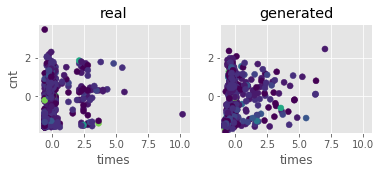

Step: 6500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5074, 0.5500, 0.5460, 0.9550
D Real - D Gen: -0.0040


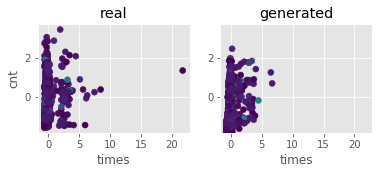

Step: 6600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4067, 0.3915, 0.3974, 0.9370
D Real - D Gen: 0.0059


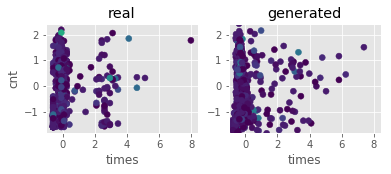

Step: 6700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4381, 0.4567, 0.4704, 0.9500
D Real - D Gen: 0.0137


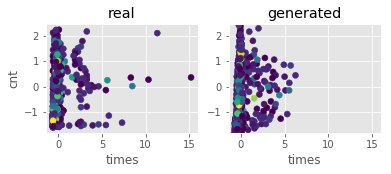

Step: 6800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4801, 0.5039, 0.5032, 0.9410
D Real - D Gen: -0.0007


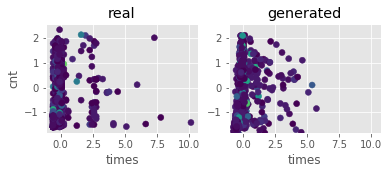

Step: 6900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4901, 0.5109, 0.5091, 0.9510
D Real - D Gen: -0.0018


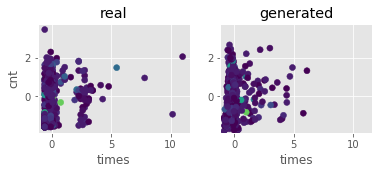

Step: 7000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4933, 0.4850, 0.4640, 0.9400
D Real - D Gen: -0.0210


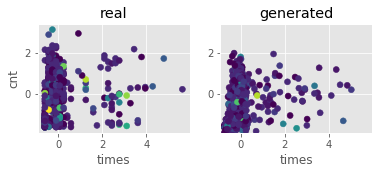

Step: 7100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5252, 0.5340, 0.5459, 0.9090
D Real - D Gen: 0.0119


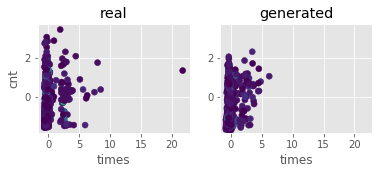

Step: 7200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5527, 0.5897, 0.5788, 0.9460
D Real - D Gen: -0.0110


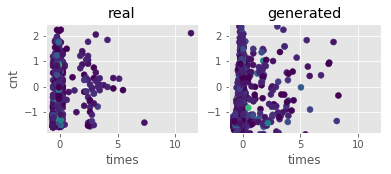

Step: 7300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5578, 0.5544, 0.5755, 0.9320
D Real - D Gen: 0.0211


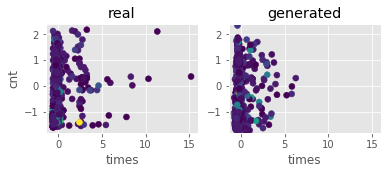

Step: 7400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5656, 0.5664, 0.5736, 0.9690
D Real - D Gen: 0.0072


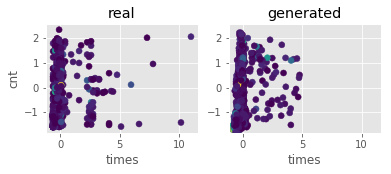

Step: 7500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5915, 0.5583, 0.5685, 0.9330
D Real - D Gen: 0.0103


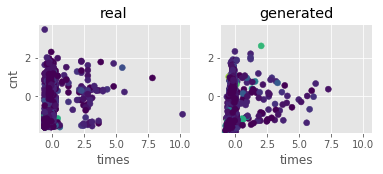

Step: 7600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5891, 0.5943, 0.5952, 0.9360
D Real - D Gen: 0.0009


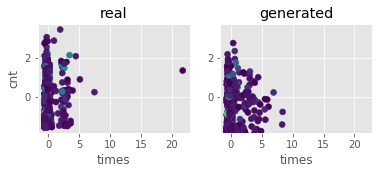

Step: 7700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5100, 0.5055, 0.5039, 0.9540
D Real - D Gen: -0.0016


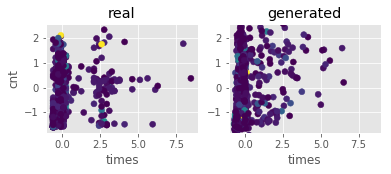

Step: 7800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5939, 0.5396, 0.5413, 0.9570
D Real - D Gen: 0.0017


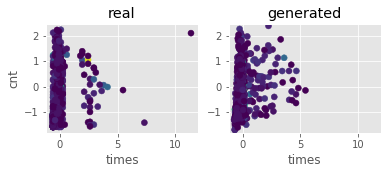

Step: 7900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5954, 0.5688, 0.5465, 0.9600
D Real - D Gen: -0.0223


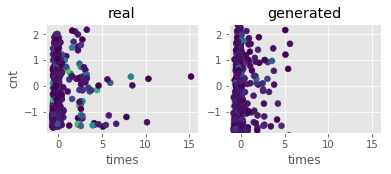

Step: 8000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5671, 0.5561, 0.5435, 0.9730
D Real - D Gen: -0.0126


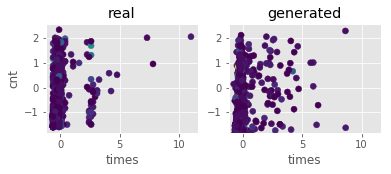

Step: 8100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6067, 0.6024, 0.5977, 0.9610
D Real - D Gen: -0.0048


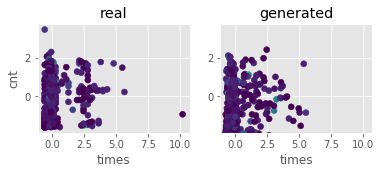

Step: 8200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5617, 0.5815, 0.5799, 0.9610
D Real - D Gen: -0.0016


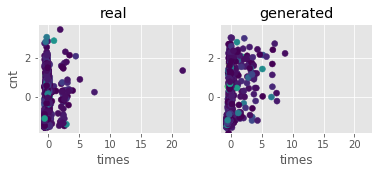

Step: 8300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5373, 0.5430, 0.5332, 0.9400
D Real - D Gen: -0.0099


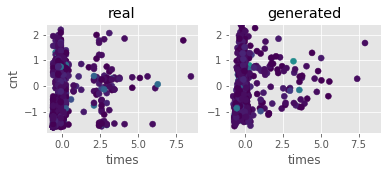

Step: 8400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6218, 0.6236, 0.6231, 0.9560
D Real - D Gen: -0.0005


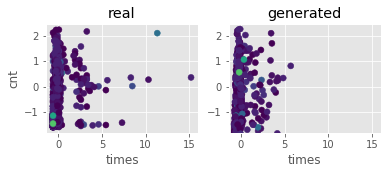

Step: 8500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6824, 0.7641, 0.7429, 0.9300
D Real - D Gen: -0.0212


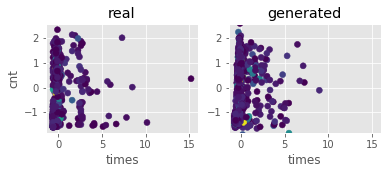

Step: 8600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6340, 0.6590, 0.6773, 0.9690
D Real - D Gen: 0.0182


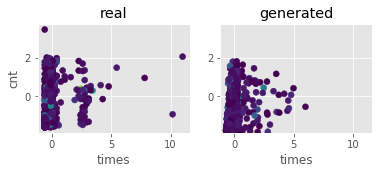

Step: 8700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5870, 0.6090, 0.6115, 0.9310
D Real - D Gen: 0.0025


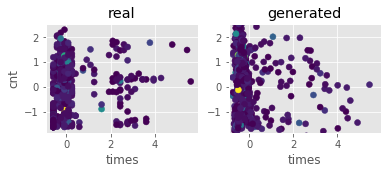

Step: 8800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6240, 0.6888, 0.6762, 0.9070
D Real - D Gen: -0.0126


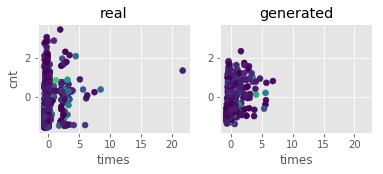

Step: 8900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6107, 0.6439, 0.6545, 0.9580
D Real - D Gen: 0.0106


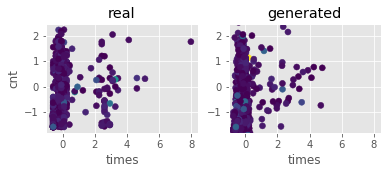

Step: 9000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7109, 0.6829, 0.6990, 0.9520
D Real - D Gen: 0.0161


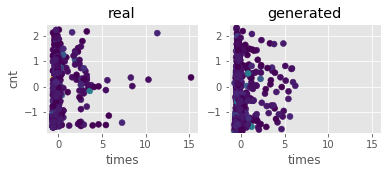

Step: 9100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7906, 0.6663, 0.6706, 0.9650
D Real - D Gen: 0.0043


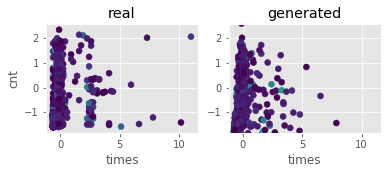

Step: 9200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6917, 0.6414, 0.6489, 0.9540
D Real - D Gen: 0.0075


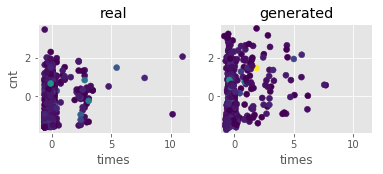

Step: 9300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7083, 0.7156, 0.7300, 0.9400
D Real - D Gen: 0.0144


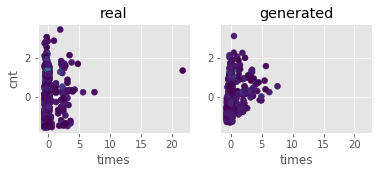

Step: 9400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6317, 0.6291, 0.6507, 0.9550
D Real - D Gen: 0.0216


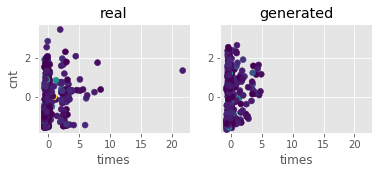

Step: 9500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7091, 0.7223, 0.7406, 0.9480
D Real - D Gen: 0.0183


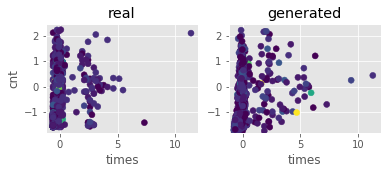

Step: 9600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7893, 0.6800, 0.6846, 0.9660
D Real - D Gen: 0.0046


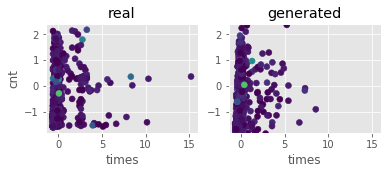

Step: 9700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5536, 0.5340, 0.5460, 0.9740
D Real - D Gen: 0.0120


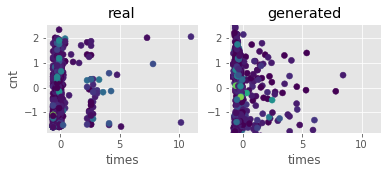

Step: 9800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6238, 0.6047, 0.6107, 0.9730
D Real - D Gen: 0.0060


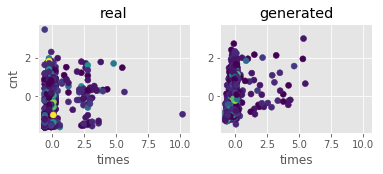

Step: 9900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5563, 0.5271, 0.5433, 0.9530
D Real - D Gen: 0.0162


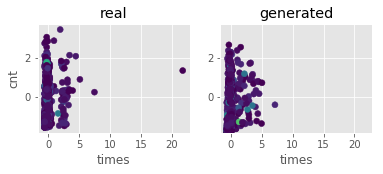

Step: 10000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5325, 0.5680, 0.5687, 0.9410
D Real - D Gen: 0.0007


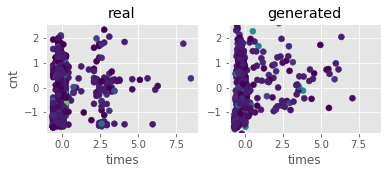

Step: 10100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6231, 0.7264, 0.7376, 0.9460
D Real - D Gen: 0.0111


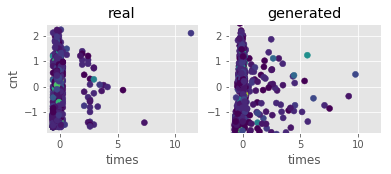

Step: 10200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5036, 0.5206, 0.5241, 0.9530
D Real - D Gen: 0.0035


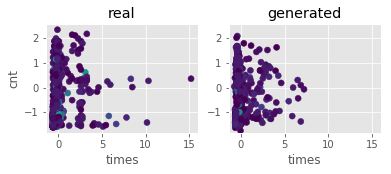

Step: 10300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6104, 0.5799, 0.5886, 0.9360
D Real - D Gen: 0.0087


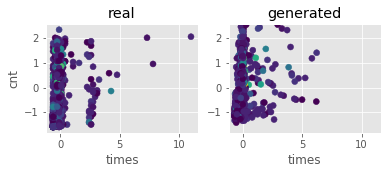

Step: 10400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5949, 0.5502, 0.5463, 0.9390
D Real - D Gen: -0.0039


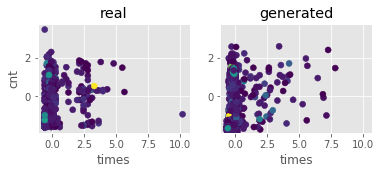

Step: 10500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4592, 0.5032, 0.5073, 0.9700
D Real - D Gen: 0.0041


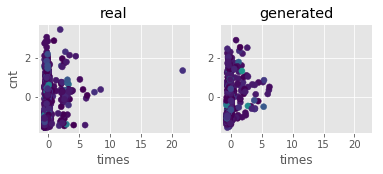

Step: 10600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5691, 0.6466, 0.7194, 0.9530
D Real - D Gen: 0.0728


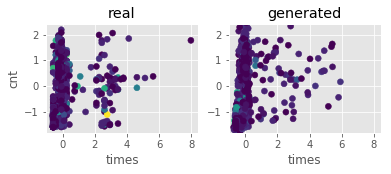

Step: 10700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6433, 0.5532, 0.5693, 0.9520
D Real - D Gen: 0.0161


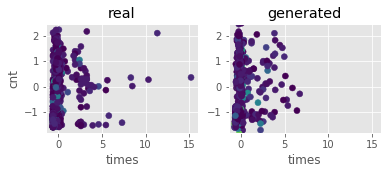

Step: 10800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5543, 0.5667, 0.5753, 0.9270
D Real - D Gen: 0.0086


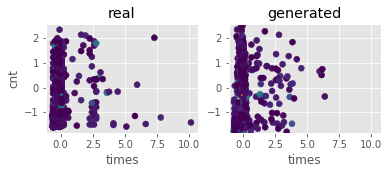

Step: 10900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4590, 0.4982, 0.4888, 0.9420
D Real - D Gen: -0.0094


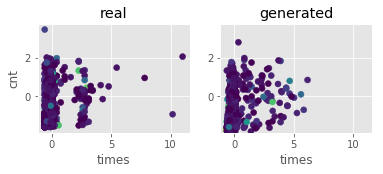

Step: 11000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5171, 0.5412, 0.5443, 0.9460
D Real - D Gen: 0.0031


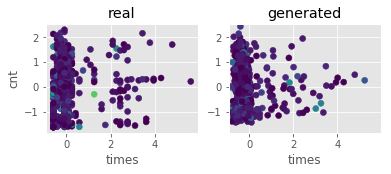

Step: 11100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4981, 0.5038, 0.5433, 0.8960
D Real - D Gen: 0.0395


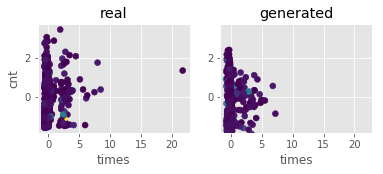

Step: 11200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5134, 0.5228, 0.5216, 0.9550
D Real - D Gen: -0.0012


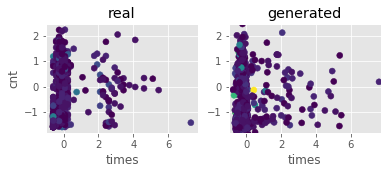

Step: 11300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5167, 0.5122, 0.5221, 0.9610
D Real - D Gen: 0.0099


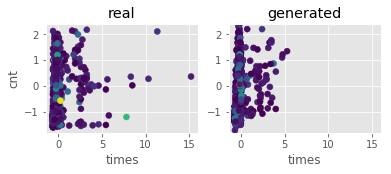

Step: 11400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3854, 0.4053, 0.4116, 0.9450
D Real - D Gen: 0.0063


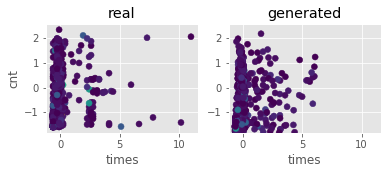

Step: 11500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4580, 0.4707, 0.4827, 0.9650
D Real - D Gen: 0.0119


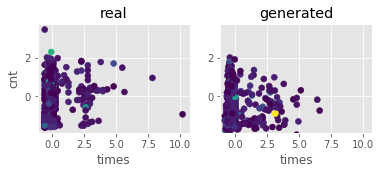

Step: 11600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4901, 0.4833, 0.4772, 0.9710
D Real - D Gen: -0.0061


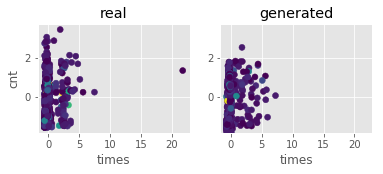

Step: 11700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4197, 0.5247, 0.5269, 0.9540
D Real - D Gen: 0.0022


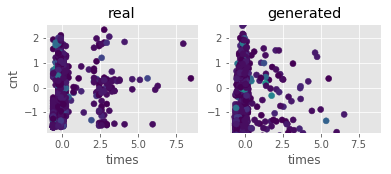

Step: 11800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4034, 0.4032, 0.4085, 0.9750
D Real - D Gen: 0.0053


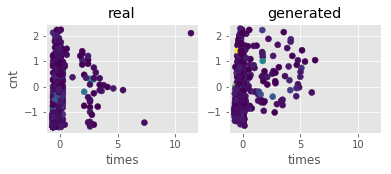

Step: 11900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4164, 0.3653, 0.4039, 0.9520
D Real - D Gen: 0.0386


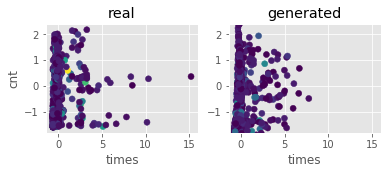

Step: 12000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3750, 0.3596, 0.3843, 0.9650
D Real - D Gen: 0.0247


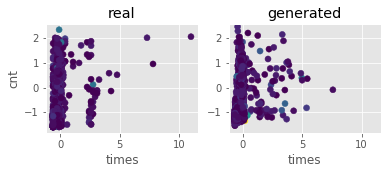

Step: 12100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4273, 0.4171, 0.4067, 0.9770
D Real - D Gen: -0.0104


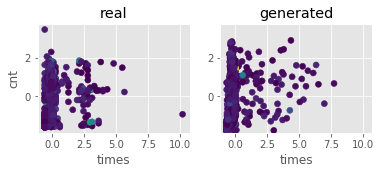

Step: 12200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2862, 0.2945, 0.2966, 0.9520
D Real - D Gen: 0.0021


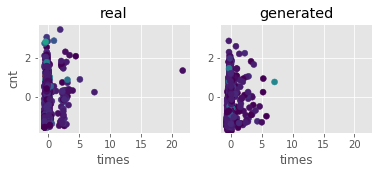

Step: 12300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4129, 0.4536, 0.4148, 0.9430
D Real - D Gen: -0.0388


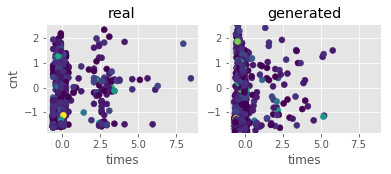

Step: 12400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3530, 0.3715, 0.3876, 0.9660
D Real - D Gen: 0.0161


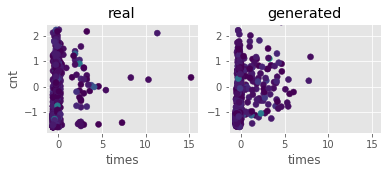

Step: 12500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4371, 0.4566, 0.4706, 0.9430
D Real - D Gen: 0.0140


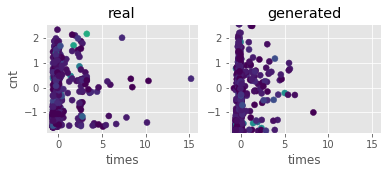

Step: 12600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3785, 0.3976, 0.3969, 0.9590
D Real - D Gen: -0.0007


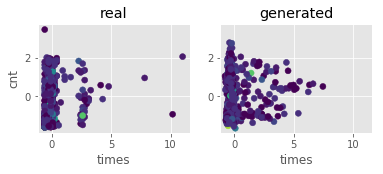

Step: 12700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5063, 0.5404, 0.5464, 0.9370
D Real - D Gen: 0.0061


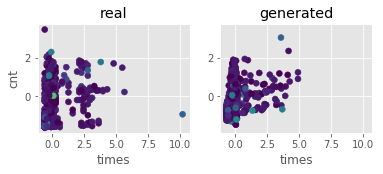

Step: 12800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4472, 0.4975, 0.4975, 0.9680
D Real - D Gen: 0.0000


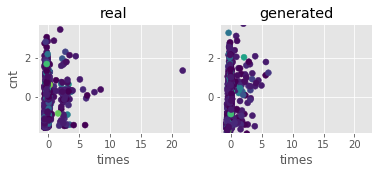

Step: 12900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3869, 0.4161, 0.4252, 0.9230
D Real - D Gen: 0.0091


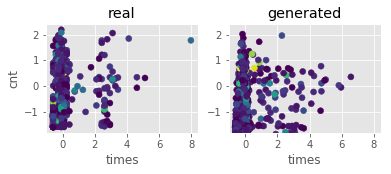

Step: 13000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4290, 0.4306, 0.4289, 0.9510
D Real - D Gen: -0.0017


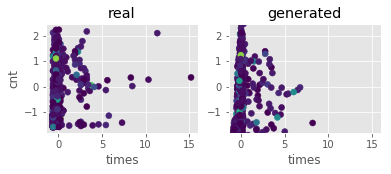

Step: 13100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3712, 0.3928, 0.4016, 0.9380
D Real - D Gen: 0.0088


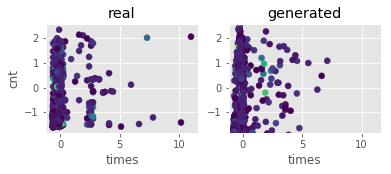

Step: 13200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4492, 0.3886, 0.3929, 0.9530
D Real - D Gen: 0.0043


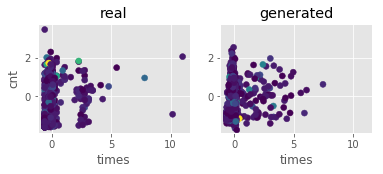

Step: 13300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3784, 0.3648, 0.3597, 0.9310
D Real - D Gen: -0.0051


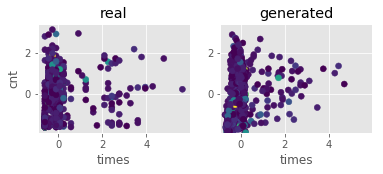

Step: 13400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2773, 0.2897, 0.2905, 0.9200
D Real - D Gen: 0.0008


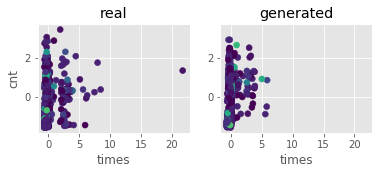

Step: 13500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3029, 0.3421, 0.3390, 0.9570
D Real - D Gen: -0.0031


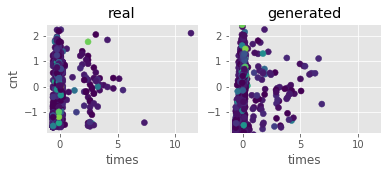

Step: 13600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3362, 0.2650, 0.2157, 0.9650
D Real - D Gen: -0.0493


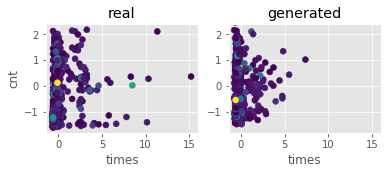

Step: 13700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3742, 0.2661, 0.2778, 0.9750
D Real - D Gen: 0.0117


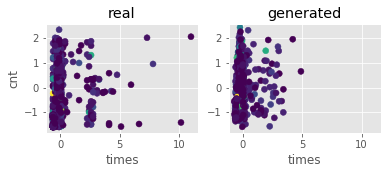

Step: 13800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4466, 0.3806, 0.3848, 0.9660
D Real - D Gen: 0.0042


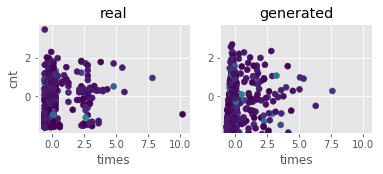

Step: 13900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3668, 0.3444, 0.3442, 0.9550
D Real - D Gen: -0.0003


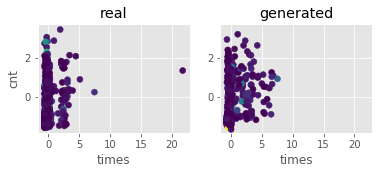

Step: 14000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4359, 0.4611, 0.4478, 0.9450
D Real - D Gen: -0.0134


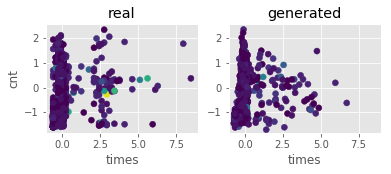

Step: 14100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3185, 0.3206, 0.3377, 0.9610
D Real - D Gen: 0.0171


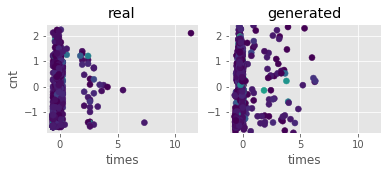

Step: 14200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4951, 0.4520, 0.4609, 0.9420
D Real - D Gen: 0.0089


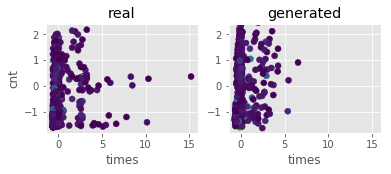

Step: 14300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4792, 0.4896, 0.5909, 0.9820
D Real - D Gen: 0.1013


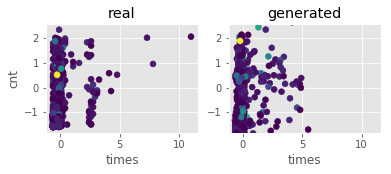

Step: 14400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4186, 0.4428, 0.4548, 0.9590
D Real - D Gen: 0.0120


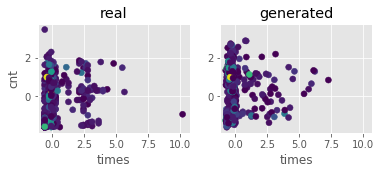

Step: 14500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5070, 0.4477, 0.4458, 0.9460
D Real - D Gen: -0.0018


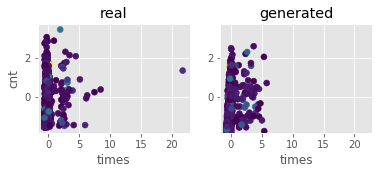

Step: 14600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4300, 0.5256, 0.5325, 0.9380
D Real - D Gen: 0.0069


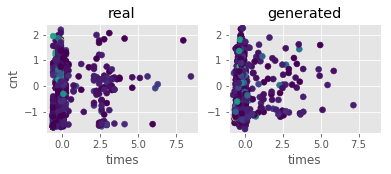

Step: 14700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4063, 0.5582, 0.5621, 0.9550
D Real - D Gen: 0.0039


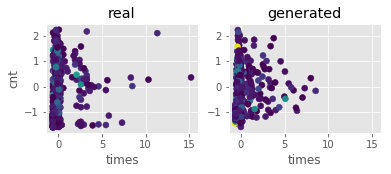

Step: 14800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5599, 0.5378, 0.5151, 0.9440
D Real - D Gen: -0.0227


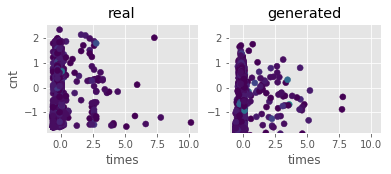

Step: 14900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4672, 0.4130, 0.3872, 0.9540
D Real - D Gen: -0.0258


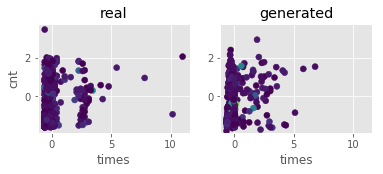

Step: 15000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4999, 0.4907, 0.4929, 0.9440
D Real - D Gen: 0.0022


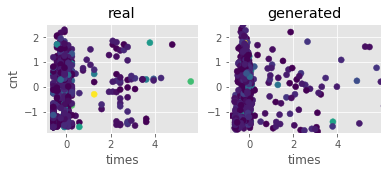

Step: 15100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4428, 0.4393, 0.4539, 0.9590
D Real - D Gen: 0.0146


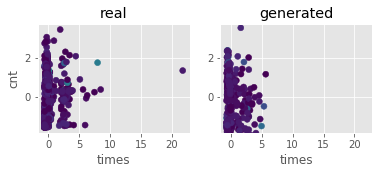

Step: 15200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5106, 0.5583, 0.5642, 0.9680
D Real - D Gen: 0.0059


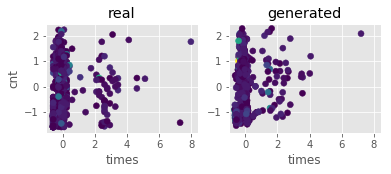

Step: 15300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4872, 0.5040, 0.4886, 0.9570
D Real - D Gen: -0.0153


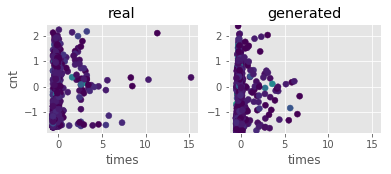

Step: 15400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3875, 0.4025, 0.4083, 0.9530
D Real - D Gen: 0.0058


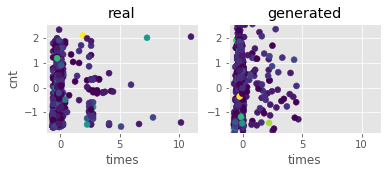

Step: 15500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4396, 0.4809, 0.4650, 0.9550
D Real - D Gen: -0.0159


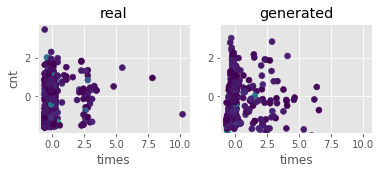

Step: 15600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3959, 0.4220, 0.4462, 0.9520
D Real - D Gen: 0.0241


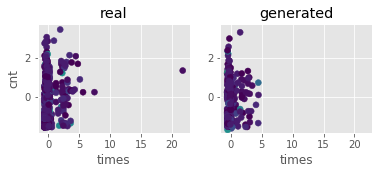

Step: 15700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3754, 0.3293, 0.3343, 0.9540
D Real - D Gen: 0.0050


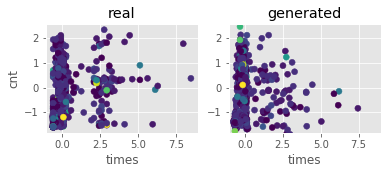

Step: 15800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3511, 0.3854, 0.3970, 0.9490
D Real - D Gen: 0.0115


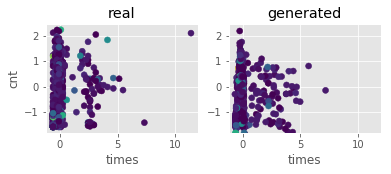

Step: 15900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3328, 0.3933, 0.3970, 0.9540
D Real - D Gen: 0.0037


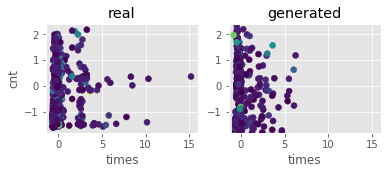

Step: 16000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2828, 0.2845, 0.2884, 0.9800
D Real - D Gen: 0.0039


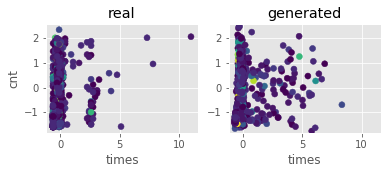

Step: 16100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2248, 0.2315, 0.2382, 0.9190
D Real - D Gen: 0.0067


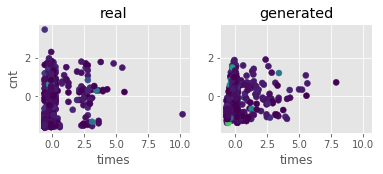

Step: 16200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2112, 0.2070, 0.1842, 0.9710
D Real - D Gen: -0.0228


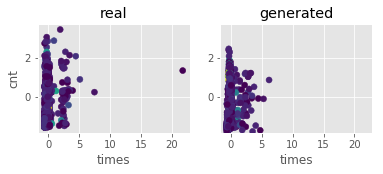

Step: 16300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1475, 0.1263, 0.1248, 0.9540
D Real - D Gen: -0.0016


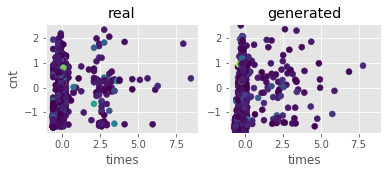

Step: 16400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1797, 0.1815, 0.1886, 0.9620
D Real - D Gen: 0.0071


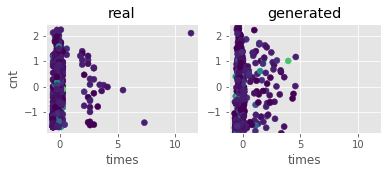

Step: 16500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2048, 0.1634, 0.1668, 0.9440
D Real - D Gen: 0.0034


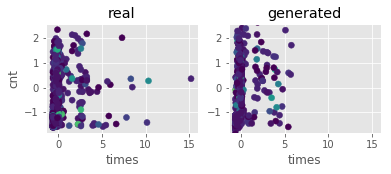

Step: 16600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2216, 0.2020, 0.1962, 0.9480
D Real - D Gen: -0.0058


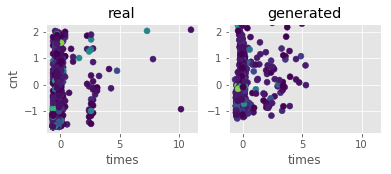

Step: 16700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2066, 0.1709, 0.1745, 0.9630
D Real - D Gen: 0.0035


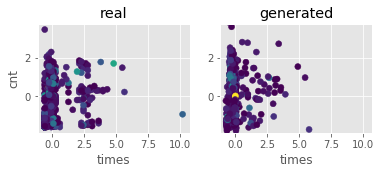

Step: 16800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2042, 0.1829, 0.1834, 0.9610
D Real - D Gen: 0.0006


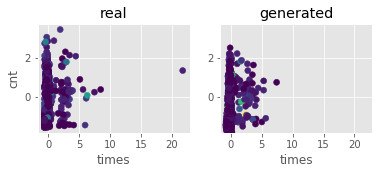

Step: 16900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2027, 0.2099, 0.2371, 0.9240
D Real - D Gen: 0.0272


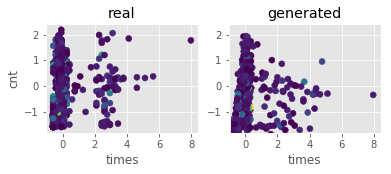

Step: 17000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1897, 0.1747, 0.1909, 0.9480
D Real - D Gen: 0.0162


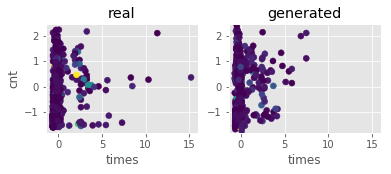

Step: 17100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2711, 0.2568, 0.2577, 0.9320
D Real - D Gen: 0.0010


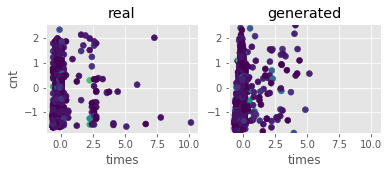

Step: 17200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2653, 0.3263, 0.3391, 0.9660
D Real - D Gen: 0.0129


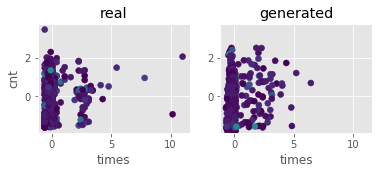

Step: 17300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3109, 0.3507, 0.3396, 0.9510
D Real - D Gen: -0.0110


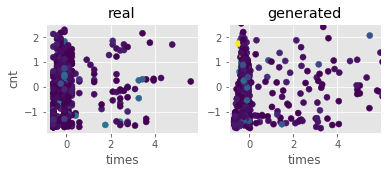

Step: 17400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3439, 0.3406, 0.3477, 0.8840
D Real - D Gen: 0.0070


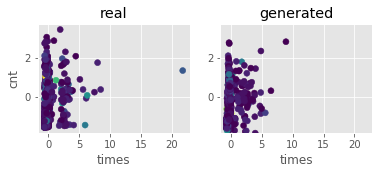

Step: 17500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1201, 0.1767, 0.1801, 0.9420
D Real - D Gen: 0.0034


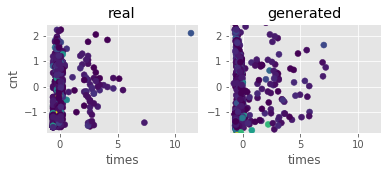

Step: 17600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2924, 0.3187, 0.3202, 0.9760
D Real - D Gen: 0.0015


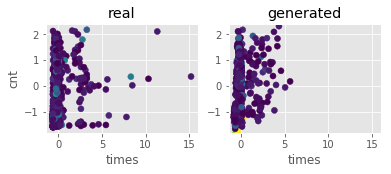

Step: 17700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3741, 0.3135, 0.3227, 0.9700
D Real - D Gen: 0.0092


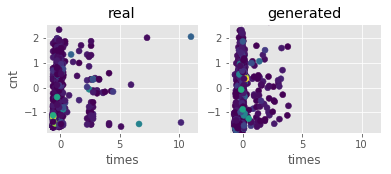

Step: 17800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3759, 0.2224, 0.2313, 0.9570
D Real - D Gen: 0.0089


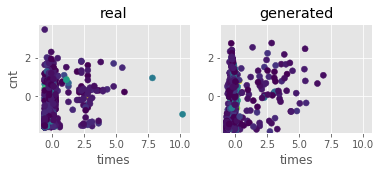

Step: 17900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3741, 0.3505, 0.3476, 0.9640
D Real - D Gen: -0.0028


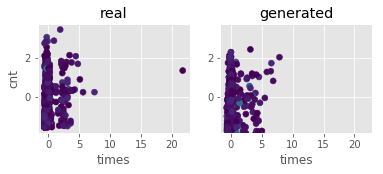

Step: 18000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2194, 0.2133, 0.2250, 0.9430
D Real - D Gen: 0.0117


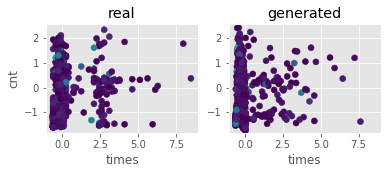

Step: 18100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3653, 0.3591, 0.3645, 0.9630
D Real - D Gen: 0.0054


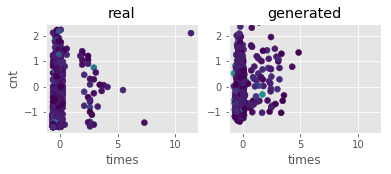

Step: 18200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3441, 0.3498, 0.4177, 0.9500
D Real - D Gen: 0.0679


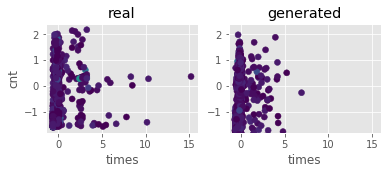

Step: 18300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3083, 0.1713, 0.2045, 0.9530
D Real - D Gen: 0.0333


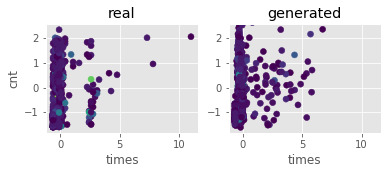

Step: 18400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2694, 0.2772, 0.2992, 0.9260
D Real - D Gen: 0.0219


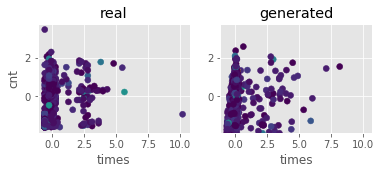

Step: 18500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2503, 0.2433, 0.2139, 0.9510
D Real - D Gen: -0.0295


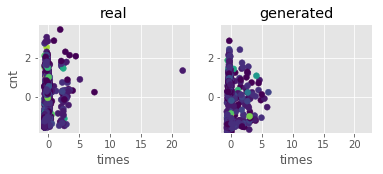

Step: 18600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3111, 0.2363, 0.2435, 0.9520
D Real - D Gen: 0.0071


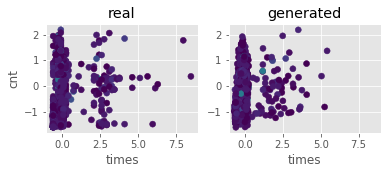

Step: 18700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1837, 0.2406, 0.2476, 0.9530
D Real - D Gen: 0.0070


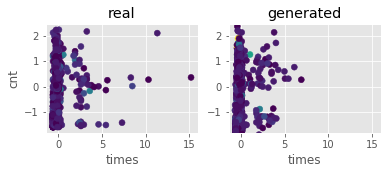

Step: 18800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3309, 0.4690, 0.4716, 0.9410
D Real - D Gen: 0.0026


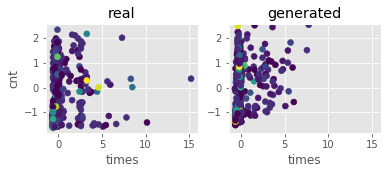

Step: 18900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2224, 0.2460, 0.3358, 0.9620
D Real - D Gen: 0.0898


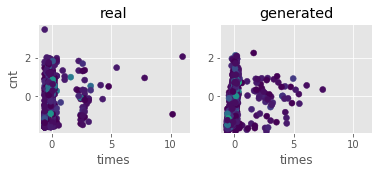

Step: 19000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2399, 0.1729, 0.1874, 0.9450
D Real - D Gen: 0.0144


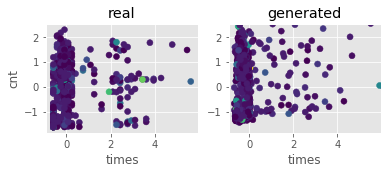

Step: 19100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3264, 0.2742, 0.2961, 0.9620
D Real - D Gen: 0.0219


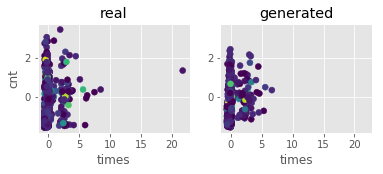

Step: 19200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2576, 0.2602, 0.2365, 0.9260
D Real - D Gen: -0.0238


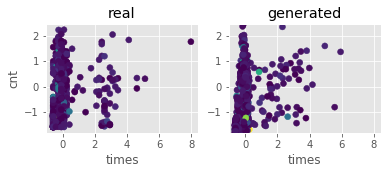

Step: 19300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2470, 0.3259, 0.2817, 0.9600
D Real - D Gen: -0.0443


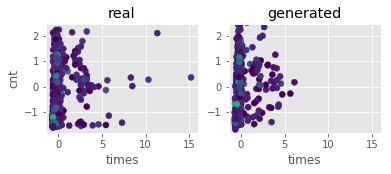

Step: 19400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3487, 0.2616, 0.3019, 0.9460
D Real - D Gen: 0.0403


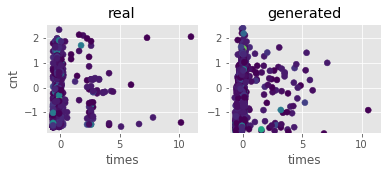

Step: 19500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1542, 0.1764, 0.1862, 0.9440
D Real - D Gen: 0.0098


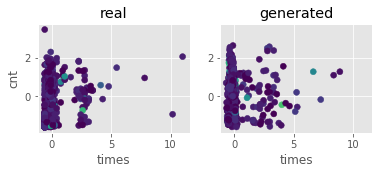

Step: 19600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2336, 0.2789, 0.2949, 0.9500
D Real - D Gen: 0.0160


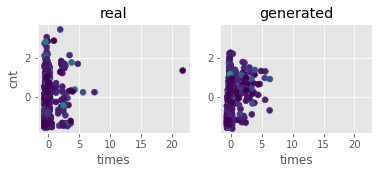

Step: 19700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2887, 0.3076, 0.3096, 0.9700
D Real - D Gen: 0.0020


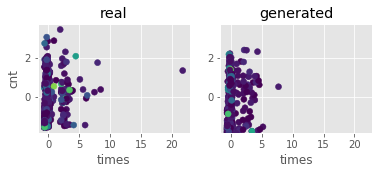

Step: 19800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2538, 0.2557, 0.2759, 0.9540
D Real - D Gen: 0.0202


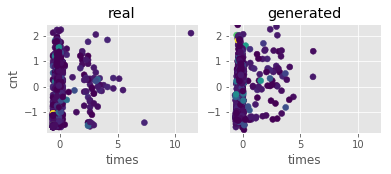

Step: 19900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2206, 0.2061, 0.1981, 0.9760
D Real - D Gen: -0.0080


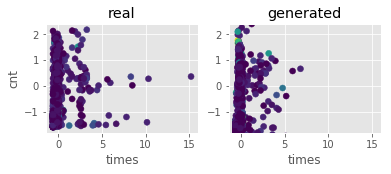

Step: 20000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2427, 0.2729, 0.2728, 0.9610
D Real - D Gen: -0.0001


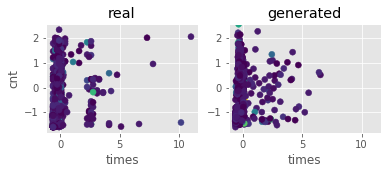

Step: 20100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3761, 0.3934, 0.4000, 0.9590
D Real - D Gen: 0.0066


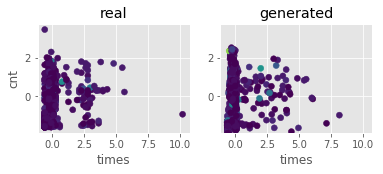

Step: 20200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2713, 0.2738, 0.2889, 0.9720
D Real - D Gen: 0.0151


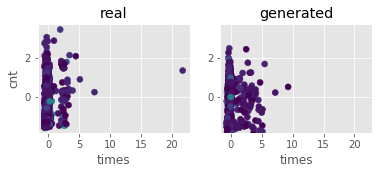

Step: 20300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3015, 0.2741, 0.2863, 0.9580
D Real - D Gen: 0.0122


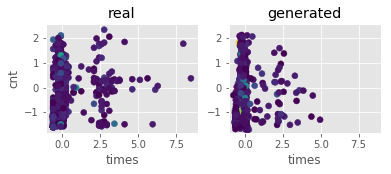

Step: 20400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1541, 0.2279, 0.2101, 0.9820
D Real - D Gen: -0.0178


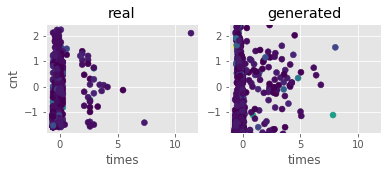

Step: 20500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1845, 0.2069, 0.2287, 0.9350
D Real - D Gen: 0.0218


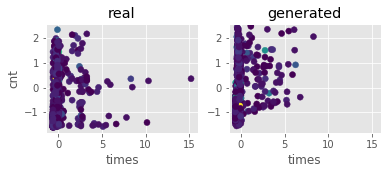

Step: 20600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4088, 0.3194, 0.2799, 0.9600
D Real - D Gen: -0.0396


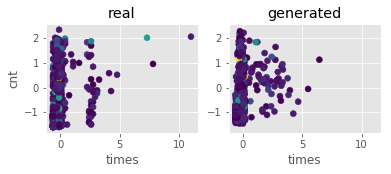

Step: 20700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3805, 0.3503, 0.3761, 0.9490
D Real - D Gen: 0.0259


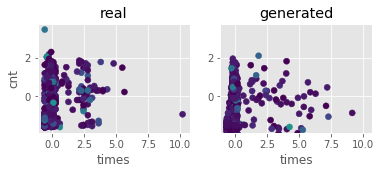

Step: 20800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.2782, 0.2402, 0.2542, 0.9670
D Real - D Gen: 0.0141


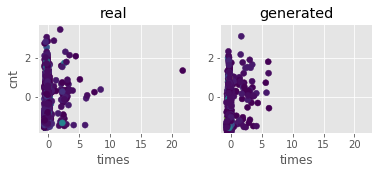

Step: 20900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0709, 0.0736, 0.0852, 0.9630
D Real - D Gen: 0.0117


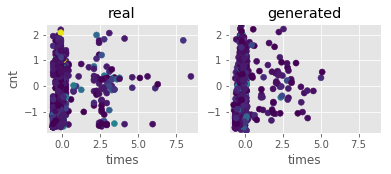

Step: 21000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0636, 0.0794, 0.1055, 0.9580
D Real - D Gen: 0.0261


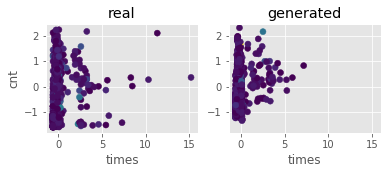

Step: 21100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.0744, 0.0974, 0.1218, 0.9420
D Real - D Gen: 0.0244


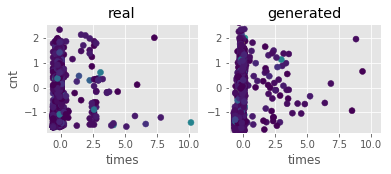

Step: 21200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1447, 0.1809, 0.1608, 0.9610
D Real - D Gen: -0.0201


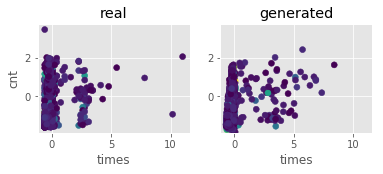

Step: 21300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1689, 0.2228, 0.2105, 0.9370
D Real - D Gen: -0.0122


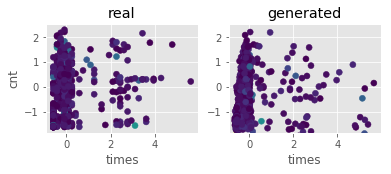

Step: 21400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1159, 0.1343, 0.1341, 0.8980
D Real - D Gen: -0.0002


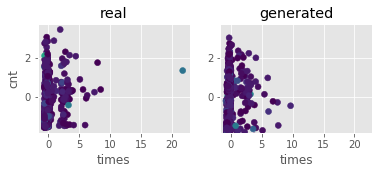

Step: 21500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.1973, 0.2186, 0.2347, 0.9440
D Real - D Gen: 0.0161


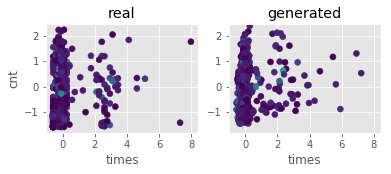

Step: 21600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3422, 0.4317, 0.4333, 0.9680
D Real - D Gen: 0.0016


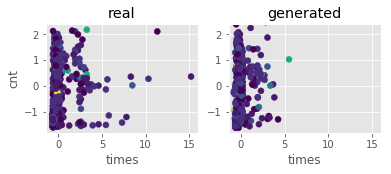

Step: 21700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.3970, 0.4369, 0.4658, 0.9550
D Real - D Gen: 0.0288


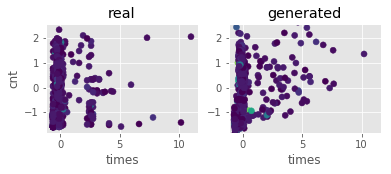

Step: 21800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4323, 0.4652, 0.4406, 0.9690
D Real - D Gen: -0.0246


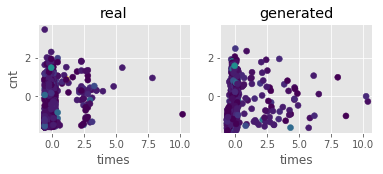

Step: 21900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4929, 0.3858, 0.3317, 0.9520
D Real - D Gen: -0.0541


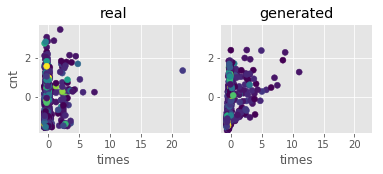

Step: 22000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5380, 0.5124, 0.4872, 0.9320
D Real - D Gen: -0.0252


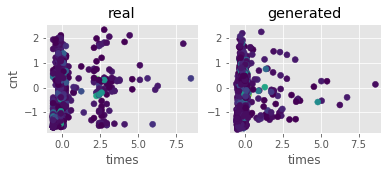

Step: 22100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5591, 0.5487, 0.5640, 0.9700
D Real - D Gen: 0.0153


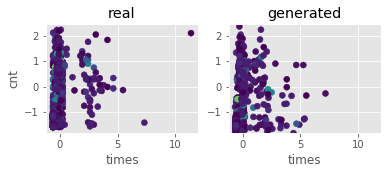

Step: 22200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4717, 0.4698, 0.4708, 0.9500
D Real - D Gen: 0.0010


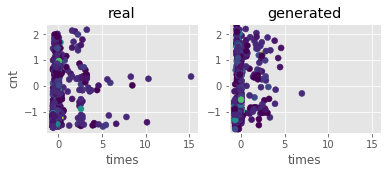

Step: 22300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6034, 0.5369, 0.5203, 0.9740
D Real - D Gen: -0.0166


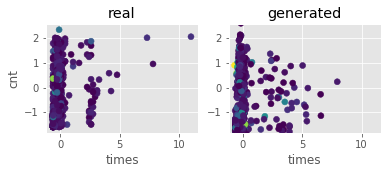

Step: 22400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5416, 0.4171, 0.4256, 0.9590
D Real - D Gen: 0.0084


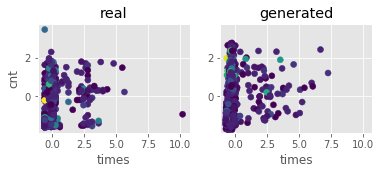

Step: 22500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5649, 0.5570, 0.5587, 0.9540
D Real - D Gen: 0.0017


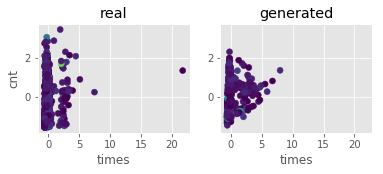

Step: 22600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5853, 0.5807, 0.6453, 0.9580
D Real - D Gen: 0.0646


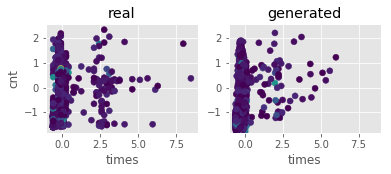

Step: 22700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5550, 0.5470, 0.5595, 0.9670
D Real - D Gen: 0.0125


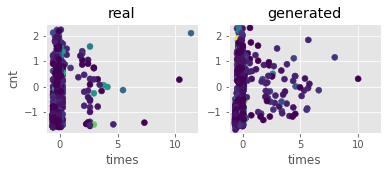

Step: 22800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4780, 0.4635, 0.5163, 0.9030
D Real - D Gen: 0.0527


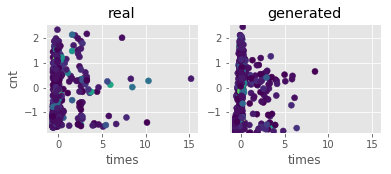

Step: 22900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6008, 0.6336, 0.6259, 0.9580
D Real - D Gen: -0.0077


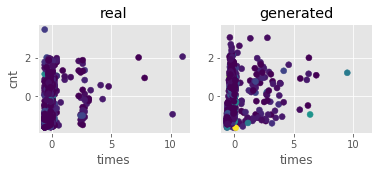

Step: 23000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6912, 0.7063, 0.7132, 0.9350
D Real - D Gen: 0.0070


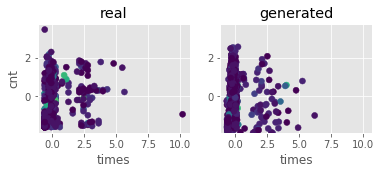

Step: 23100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5767, 0.5864, 0.5811, 0.9590
D Real - D Gen: -0.0053


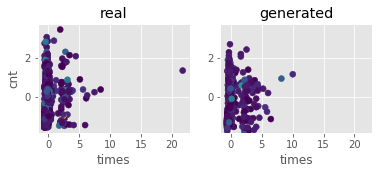

Step: 23200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.4448, 0.4337, 0.3800, 0.9470
D Real - D Gen: -0.0536


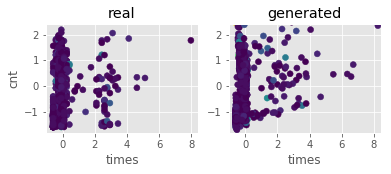

Step: 23300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6240, 0.6230, 0.6077, 0.9410
D Real - D Gen: -0.0153


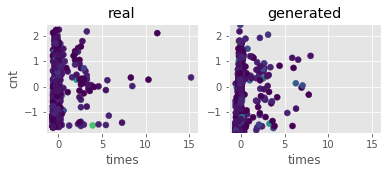

Step: 23400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5165, 0.5994, 0.6090, 0.9220
D Real - D Gen: 0.0096


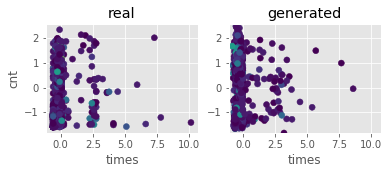

Step: 23500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6378, 0.5646, 0.5540, 0.9520
D Real - D Gen: -0.0106


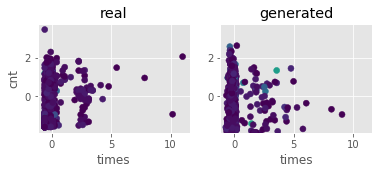

Step: 23600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.5820, 0.5355, 0.5357, 0.9300
D Real - D Gen: 0.0001


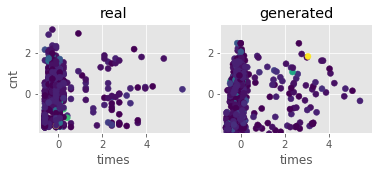

Step: 23700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6120, 0.6234, 0.6314, 0.9170
D Real - D Gen: 0.0080


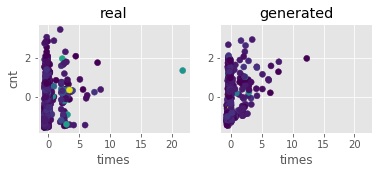

Step: 23800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7117, 0.6886, 0.6844, 0.9350
D Real - D Gen: -0.0042


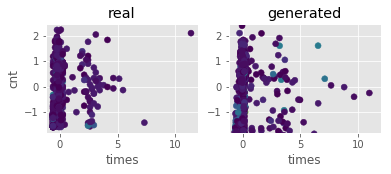

Step: 23900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6286, 0.6549, 0.6613, 0.9640
D Real - D Gen: 0.0065


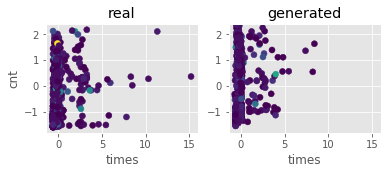

Step: 24000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7440, 0.7477, 0.7629, 0.9690
D Real - D Gen: 0.0152


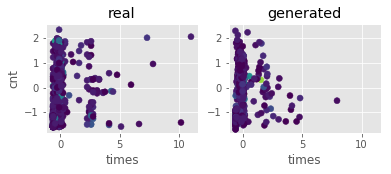

Step: 24100 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.6574, 0.6467, 0.6477, 0.9520
D Real - D Gen: 0.0010


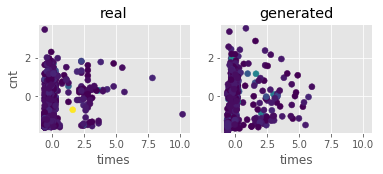

Step: 24200 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7183, 0.7107, 0.7051, 0.9540
D Real - D Gen: -0.0055


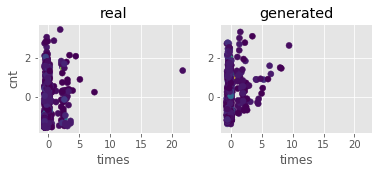

Step: 24300 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7404, 0.7746, 0.7866, 0.9660
D Real - D Gen: 0.0121


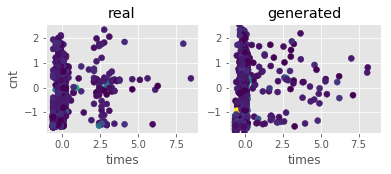

Step: 24400 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7204, 0.6913, 0.7034, 0.9640
D Real - D Gen: 0.0121


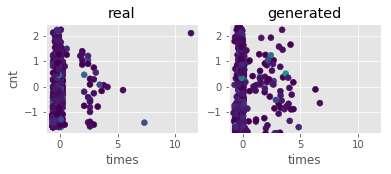

Step: 24500 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7965, 0.8321, 0.8229, 0.9580
D Real - D Gen: -0.0092


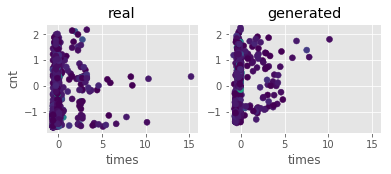

Step: 24600 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.8594, 0.8674, 0.8642, 0.9780
D Real - D Gen: -0.0032


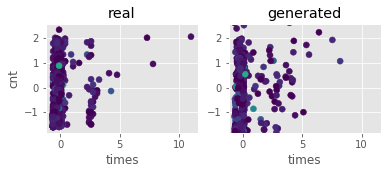

Step: 24700 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7927, 0.7848, 0.7805, 0.9640
D Real - D Gen: -0.0043


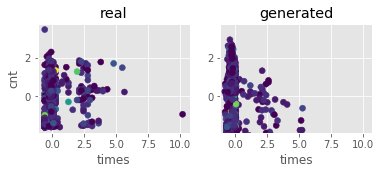

Step: 24800 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.8726, 0.8658, 0.8743, 0.9710
D Real - D Gen: 0.0085


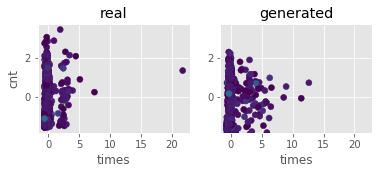

Step: 24900 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.7092, 0.7240, 0.7537, 0.9480
D Real - D Gen: 0.0297


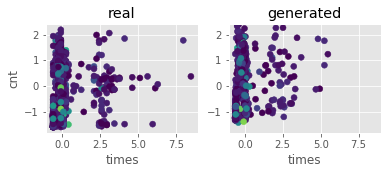

Step: 25000 of 25001.
Losses: G, D Gen, D Real, Xgb: -0.9420, 0.9269, 0.9217, 0.9590
D Real - D Gen: -0.0052


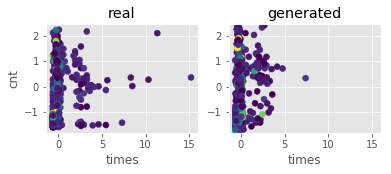

Finish training GAN
CPU times: user 1h 33min 52s, sys: 4min 35s, total: 1h 38min 28s
Wall time: 25min 21s


In [10]:
#%%time
# Arguments
rand_dim = 32                       # needs to be ~data_dim
base_n_count = 128
nb_steps = 25000 + 1                # Add one for logging of the last interval
batch_size = 64
k_d = 5                             # number of critic network updates per adversarial training step
k_g = 1                             # number of generator network updates per adversarial training step
critic_pre_train_steps = 100        # number of steps to pre-train the critic before starting adversarial training
log_interval = 100                  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 1e-4                # WGAN: 5e-5, WGAN-GP: 1e-4, CGAN: 2e-4
data_dir = 'cache/'
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)              # check dir is exist
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

show = True                        # choose whether to show the traing img

random_subset = fraud_w_classes.copy().reset_index(drop=True)                               # fraud only with labels from classification, reset the index
arguments = [rand_dim, nb_steps, batch_size, k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
             data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show]
arguments[1] = 25001
arguments[2] = 64

# Four GANs
# adversarial_training_GAN(arguments, random_subset, data_cols=data_cols)                             # GAN
# adversarial_training_WGAN(arguments, train, data_cols=data_cols)                                    # WGAN
# adversarial_training_InfoGAN(arguments, train, data_cols=data_cols)                                 # InfoGAN
# adversarial_training_GAN(arguments, random_subset, data_cols=data_cols, label_cols=label_cols)      # CGAN
label_cols = ['ret_cnt', 'ret_times']
adversarial_training_WGAN(arguments, train, train_o, data_cols=data_cols, label_cols=label_cols)             # WCGAN
print('Finish training GAN')

In [4]:
# Let's look at some of the generated data
# First create the networks locally and load the weights
print('Create networks')
seed = 17
data_dim = len(data_cols)
label_dim = len(label_cols)
with_class = True if label_dim > 0 else False
# with_class = False
np.random.seed(seed)

# Define four network models
# with class
generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type='Wasserstein')
generator_model.load_weights('cache/WCGAN_generator_model_weights_step_' + str(nb_steps - 1) + '.h5')
# generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count)
# generator_model.load_weights('cache/CGAN_generator_model_weights_step_' + str(nb_steps - 1) + '.h5')

# with_class = False
# train = train_no_label
# label_cols = []
# generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count, type='Wasserstein')
# generator_model.load_weights('cache/WGAN_generator_model_weights_step_' + str(nb_steps - 1) + '.h5')
# generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
# generator_model.load_weights('cache/GAN_generator_model_weights_step_' + str(nb_steps - 1) + '.h5')
# generator_model, discriminator_model, combined_model = define_models_InfoGAN(rand_dim, data_dim, base_n_count)
# generator_model.load_weights('cache/InfoGAN_generator_model_weights_step_' + str(nb_steps - 1) + '.h5')
print('-------------------------')


Create networks
-------------------------


Generate new data and result


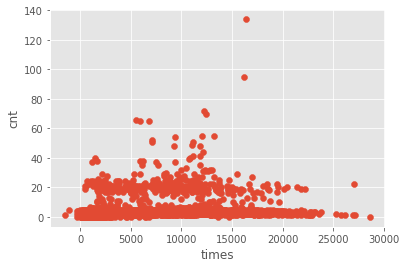

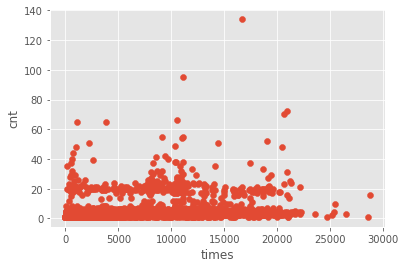

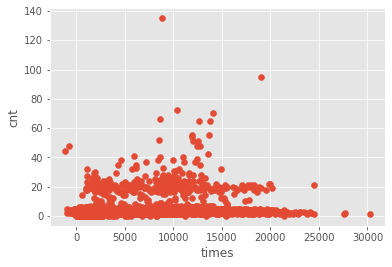

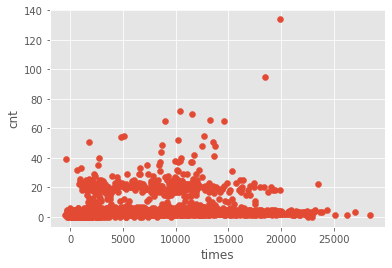

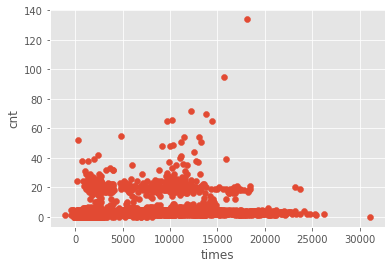

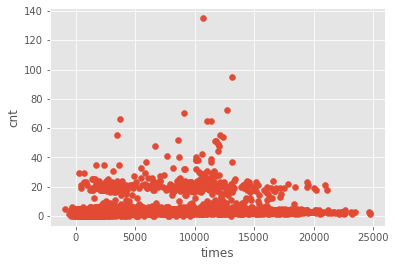

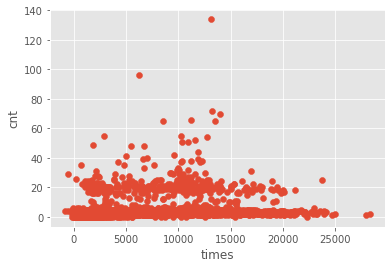

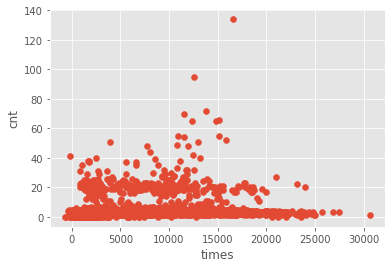

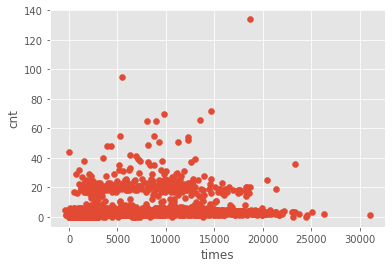

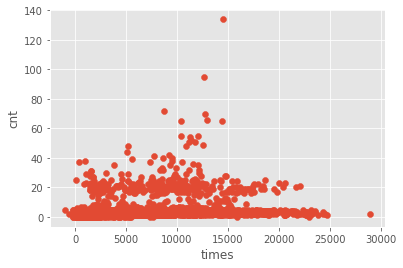

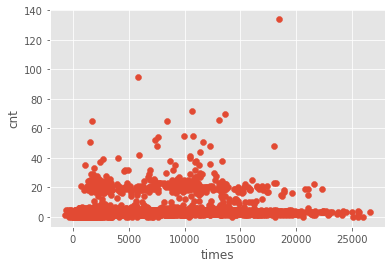

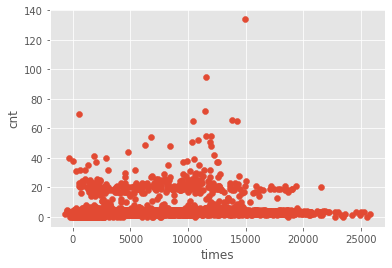

-------------------------


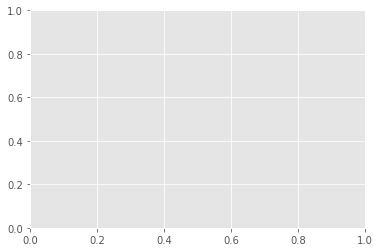

In [5]:
# Now generate some new data
print('Generate new data and result')
test_size = int(dataSample.values.shape[0])             # Equal to all of the fraud cases, dataSample: 1554, test_size: 518

# generate some data and use generator to get result
x = get_data_batch(train, test_size, seed=seed)
z = np.random.normal(size=(test_size, rand_dim))
if with_class:
    labels = x[:, :1]
    g_z = generator_model.predict([z, labels])
else:
    g_z = generator_model.predict(z)

# denormailize the generator's result
result = g_z.copy()
# print(labels)
# print(result)
result[:, 0] *= dataSample.std()[0]
result[:, 0] += dataSample.mean()[0]

result[:, 1] *= dataSample.std()[1]
result[:, 1] += dataSample.mean()[1]

b = result[:, 0].astype('int').reshape(-1, 1)
c = result[:, 1].astype('float64').reshape(-1, 1)
result = np.concatenate((b, c), axis=1)

np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.6f}'.format}) # setting print floating point numbers, and print format

x1 = result[:, 1]
y1 = result[:, 0]

# print the generator data pic
plt.scatter(x1, y1)
plt.xlabel('times')
plt.ylabel('cnt')
save_name = data_dir + 'generator_fig' + '.png'
plt.savefig(save_name)
plt.show()
plt.cla()

# print the original data figure
origin = dataSample.values.copy()
x2 = origin[:, 1]
y2 = origin[:, 0]
plt.scatter(x2, y2)
plt.xlabel('times')
plt.ylabel('cnt')
save_name = data_dir + 'original_fig' + '.png'
plt.savefig(save_name)
plt.show()
plt.cla()

# show_info(x1, y1)
# show_info(x2, y2)

# generate some data and use generator to get result
# run 10 times to generate data and result
for i in range(10):
    np.random.seed(i)
    z = np.random.normal(size=(test_size, rand_dim))
    labels = x[:,:1]
    g_z = generator_model.predict([z, labels])
    
    # denormailize the generator's result
    result = g_z.copy()
    result[:, 0] *= dataSample.std()[0]
    result[:, 0] += dataSample.mean()[0]

    result[:, 1] *= dataSample.std()[1]
    result[:, 1] += dataSample.mean()[1]

    b = result[:, 0].astype('int').reshape(-1, 1)
    c = result[:, 1].astype('float64').reshape(-1, 1)

    result = np.concatenate((b, c), axis=1)

    x1 = result[:, 1]
    y1 = result[:, 0]

    # print the generate data figure
    plt.scatter(x1, y1)
    plt.xlabel('times')
    plt.ylabel('cnt')
    save_name = data_dir + 'result_' + str(i + 1) + '_fig' + '.png'
    plt.savefig(save_name)
    plt.show()
    plt.cla()
print('-------------------------')

Load model
Find best xgb scores overall and saved
WCGAN step 1730: 0.9100
WCGAN step 5100: 0.9330

Look at the unsmoothed losses
0


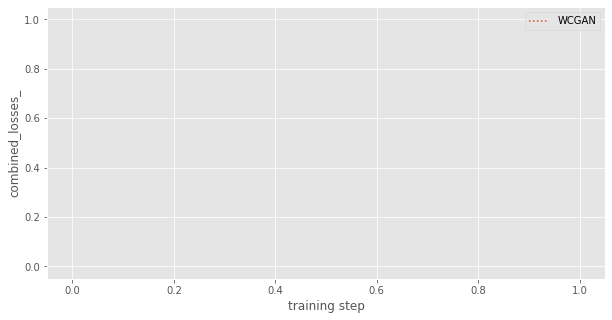

0


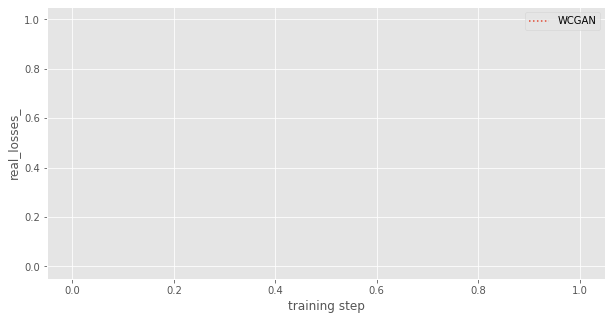

0


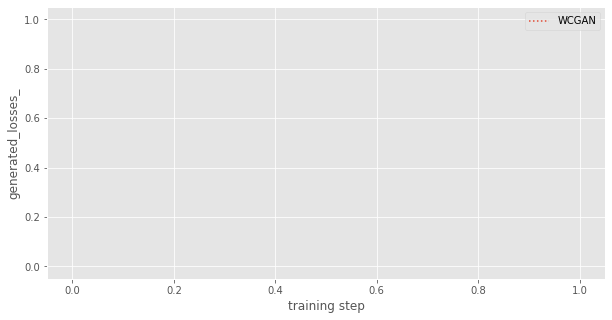

0


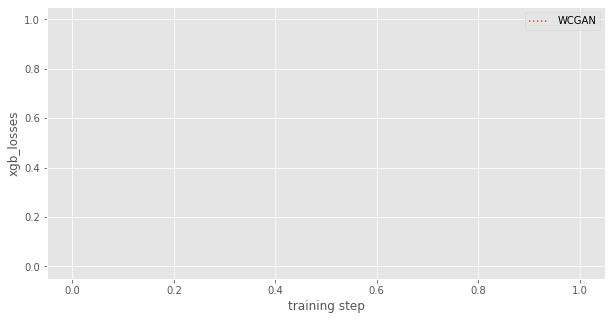

100


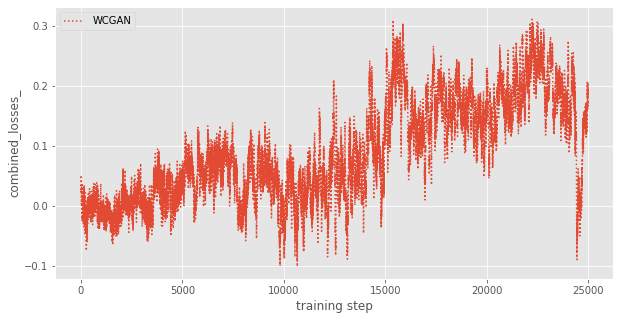

100


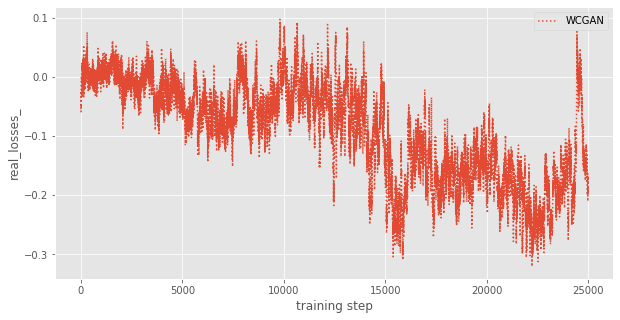

100


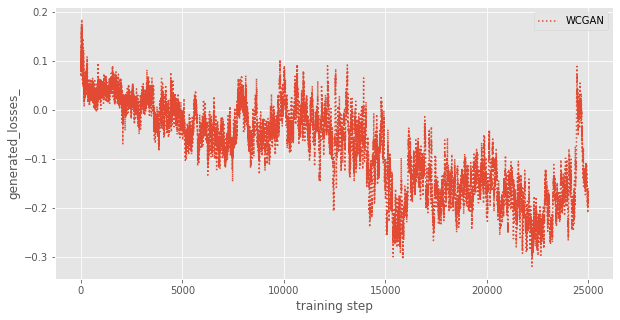

100


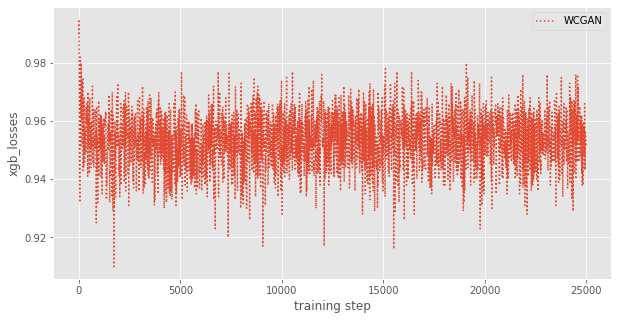

In [6]:
import gan_func
importlib.reload(gan_func)  # For reloading after making changes
from gan_func import *
# load model
print('Load model')
base_dir = 'cache/'
suffix = '_step_' + str(nb_steps - 1)

# separate be combined_loss, disc_loss_real, disc_loss_generated, xgb_losses
# GAN_losses = pickle.load(open(base_dir + 'GAN_losses' + suffix + '.pkl', 'rb'))
# CGAN_losses = pickle.load(open(base_dir + 'CGAN_losses' + suffix + '.pkl', 'rb'))
# WGAN_losses = pickle.load(open(base_dir + 'WGAN_losses' + suffix + '.pkl', 'rb'))
WCGAN_losses = pickle.load(open(base_dir + 'WCGAN_losses' + suffix + '.pkl', 'rb'))

# linestyles = ['-', '--', '-.', ':']
losses = WCGAN_losses
label = 'WCGAN'
linestyle = ':'

# Find best xgb scores overall and saved (every 100 steps)
print('Find best xgb scores overall and saved')

data_ix = 3
# data_sets = [GAN_losses[data_ix], CGAN_losses[data_ix], WGAN_losses[data_ix], WCGAN_losses[data_ix]]
# labels = ['GAN', 'CGAN', 'WGAN', 'WCGAN']
data_set = losses[data_ix]

best_step = list(data_set).index(np.array(data_set).min()) * 10
print('{: <5} step {: <4}: {:.4f}'.format(label, best_step, np.array(data_set).min()))

xgb100 = [data_set[i] for i in range(0, len(data_set), 10)]
best_step = xgb100.index(min(xgb100)) * 100
print('{: <5} step {: <4}: {:.4f}\n'.format(label, best_step, np.array(xgb100).min()))
# print(best_step, min(xgb100))


# Look at the unsmoothed losses
print('Look at the unsmoothed losses')
unsmoothed_losses(losses, label, linestyle)
unsmoothed_losses(losses, label, linestyle, 100)

Create a figure for the critic losses for the WGAN


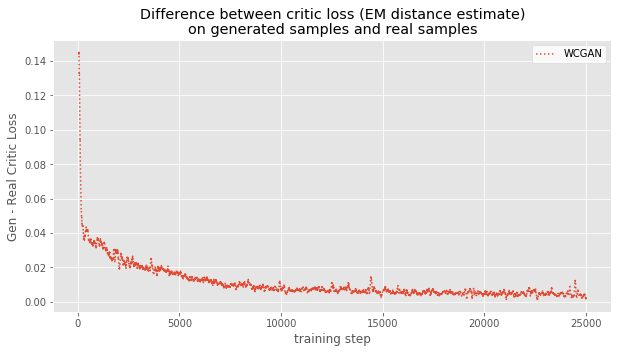

In [7]:
# Create a figure for the critic losses for the WGAN and WCGAN
print('Create a figure for the critic losses for the WGAN')
w = 50       # Size of the moving window. This is the number of observations used for calculating the statistic.
data_ix0 = 2 # generated_losses_
data_ix1 = 1 # real_losses_
# data_fields = ['combined_losses_', 'real_losses_', 'generated_losses_', 'xgb_losses']

# labels = ['GAN','CGAN','WGAN','WCGAN'][1:3]
# data_sets0 = [GAN_losses[data_ix0], CGAN_losses[data_ix0], WGAN_losses[data_ix0], WCGAN_losses[data_ix0]][1:3]
# data_sets1 = [GAN_losses[data_ix1], CGAN_losses[data_ix1], WGAN_losses[data_ix1], WCGAN_losses[data_ix1]][1:3]
# linestyles = ['-', '--', '-.', ':'][1:3]

plt.figure(figsize=(10, 5))
data0 = losses[data_ix0]
data1 = losses[data_ix1]
plt.plot(range(0, len(data0)), pd.DataFrame(np.array(data0) - np.array(data1)).rolling(w).mean(), label=label, linestyle=linestyle)
plt.title('Difference between critic loss (EM distance estimate)\non generated samples and real samples')
plt.xlabel('training step')
plt.ylabel('Gen - Real Critic Loss')
legend = plt.legend() 
legend.get_frame().set_facecolor('white')
plt.savefig('cache/Delta_critic_loss_plot.png')

# save result
np.savetxt('result.txt', result, newline='\n', fmt='%0.2f')